# Análisis del Dataset "Resultados ICFES"

## Carga de datos

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

In [3]:
raw_df = pd.read_csv('./clean_data.csv')
raw_df = raw_df.drop(columns=['estudiante_fechanacimiento']) # Eliminar columna no usada

categorical_columns = raw_df.select_dtypes(include=['object']).columns
too_many_categories_columns = ['colegio_municipio', 'colegio_nombre', 'colegio_departamento', 'estudiante_departamento', 'estudiante_municipio']
can_plot_categorical_columns = [column for column in categorical_columns if column not in too_many_categories_columns]
numeric_columns = [i for i in raw_df.select_dtypes(include=[np.number]).columns if i != 'periodo']

raw_df

periodo colegio_area colegio_bilingue colegio_calendario  \
0          20152       URBANO                N                  A   
1          20194       URBANO                N                  A   
2          20194       URBANO                N                  A   
3          20211       URBANO              NaN                  B   
4          20162        RURAL                N                  A   
...          ...          ...              ...                ...   
4496027    20224       URBANO                N                  A   
4496028    20224       URBANO                N                  A   
4496029    20224       URBANO                N                  A   
4496030    20224       URBANO                N                  A   
4496031    20224       URBANO                N                  A   

        colegio_caracter colegio_departamento colegio_genero colegio_jornada  \
0              ACADÉMICO            ANTIOQUIA      MASCULINO          MAÑANA   
1                TÉCNICO                VALLE          MIXTO        SABATINA   
2                TÉCNICO                VALLE          MIXTO        SABATINA   
3              ACADÉMICO            ATLANTICO          MIXTO        COMPLETA   
4              ACADÉMICO               BOGOTA      MASCULINO        COMPLETA   
...                  ...                  ...            ...             ...   
4496027        ACADÉMICO              BOLIVAR          MIXTO          MAÑANA   
4496028        ACADÉMICO               BOGOTÁ          MIXTO           TARDE   
4496029          TÉCNICO               ARAUCA          MIXTO          MAÑANA   
4496030        ACADÉMICO            ANTIOQUIA          MIXTO        COMPLETA   
4496031        ACADÉMICO            ANTIOQUIA          MIXTO        COMPLETA   

        colegio_municipio colegio_naturaleza  \
0                  ITAGUI            OFICIAL   
1                   YUMBO         NO OFICIAL   
2                   YUMBO         NO OFICIAL   
3         PUERTO COLOMBIA         NO OFICIAL   
4             BOGOTÁ D.C.         NO OFICIAL   
...                   ...                ...   
4496027          MAGANGUÉ            OFICIAL   
4496028       BOGOTÁ D.C.            OFICIAL   
4496029            ARAUCA            OFICIAL   
4496030            ITAGÜÍ         NO OFICIAL   
4496031          APARTADÓ         NO OFICIAL   

                                            colegio_nombre  \
0            INSTITUCIÓN EDUCATIVA JUAN NEPOMUCENO CADAVID   
1           COL COOP TECNICO INDUSTRIAL JOSE ANTONIO GALAN   
2           COL COOP TECNICO INDUSTRIAL JOSE ANTONIO GALAN   
3                                         COLEGIO SAN JOSÉ   
4                                           COL SAN VIATOR   
...                                                    ...   
4496027                                       I.E. DE YATI   
4496028                            COLEGIO TOM ADAMS (IED)   
4496029           INSTITUCION EDUCATIVA TECNICO CRISTO REY   
4496030                                     COLEGIO ALEMAN   
4496031  COL. COOPERATIVO APARTADO CARLOS ARTURO ROLDAN...   

        estudiante_departamento estudiante_genero estudiante_municipio  \
0                     ANTIOQUIA                 M               ITAGÜÍ   
1                         VALLE                 F                YUMBO   
2                         VALLE                 F                YUMBO   
3                     ATLANTICO                 M         BARRANQUILLA   
4                        BOGOTÁ                 F          BOGOTÁ D.C.   
...                         ...               ...                  ...   
4496027                 BOLIVAR                 F             MAGANGUÉ   
4496028                  BOGOTÁ                 F          BOGOTÁ D.C.   
4496029                  ARAUCA                 M               ARAUCA   
4496030               ANTIOQUIA                 M               ITAGÜÍ   
4496031               ANTIOQUIA                 F               CAREPA   

        

## Validación de datos

### ¿Qué tipo de dato son las variables del conjunto de datos?

In [4]:
raw_df.dtypes

periodo                          int64
colegio_area                    object
colegio_bilingue                object
colegio_calendario              object
colegio_caracter                object
colegio_departamento            object
colegio_genero                  object
colegio_jornada                 object
colegio_municipio               object
colegio_naturaleza              object
colegio_nombre                  object
estudiante_departamento         object
estudiante_genero               object
estudiante_municipio            object
puntaje_ingles                 float64
puntaje_matematicas            float64
puntaje_sociales_ciudadanas    float64
puntaje_ciencias_naturales     float64
puntaje_lectura_critica        float64
puntaje_global                 float64
dtype: object

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [5]:
raw_df.shape

(4496032, 20)

### ¿Existen valores nulos explicitos en el conjunto de datos?

In [6]:
raw_df.isnull().any()

periodo                        False
colegio_area                    True
colegio_bilingue                True
colegio_calendario              True
colegio_caracter                True
colegio_departamento            True
colegio_genero                  True
colegio_jornada                 True
colegio_municipio               True
colegio_naturaleza              True
colegio_nombre                  True
estudiante_departamento         True
estudiante_genero               True
estudiante_municipio            True
puntaje_ingles                 False
puntaje_matematicas            False
puntaje_sociales_ciudadanas    False
puntaje_ciencias_naturales     False
puntaje_lectura_critica        False
puntaje_global                 False
dtype: bool

### Mapear las variables categóricas

In [7]:
# Convertir las columnas categóricas a tipo 'category'
raw_df[categorical_columns] = raw_df[categorical_columns].astype('category')

### De tener observaciones con valores inconsistentes (nulos), ¿cuántas tenemos por cada variable?

In [8]:
raw_df.isnull().sum().sort_values(ascending=False)

colegio_bilingue               665587
colegio_caracter                95626
estudiante_genero                3229
estudiante_departamento          2053
estudiante_municipio             2053
colegio_area                        7
colegio_nombre                      2
colegio_calendario                  2
colegio_departamento                2
colegio_genero                      2
colegio_jornada                     2
colegio_municipio                   2
colegio_naturaleza                  2
puntaje_sociales_ciudadanas         0
puntaje_lectura_critica             0
puntaje_ciencias_naturales          0
periodo                             0
puntaje_matematicas                 0
puntaje_ingles                      0
puntaje_global                      0
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [9]:
raw_df.isnull().sum().sum()

768569

### ¿Cuál es la proporción de valores nulos por cada variable?

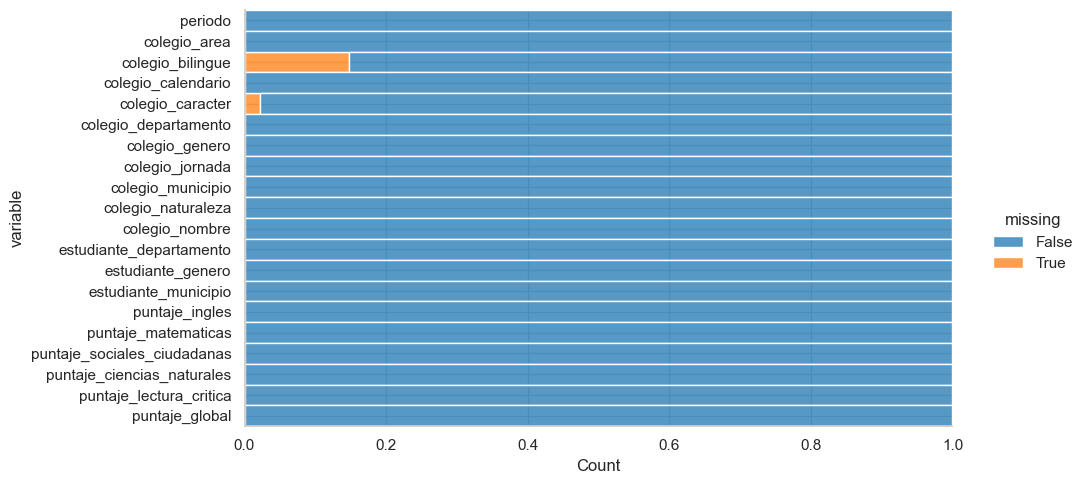

In [10]:
(
    raw_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

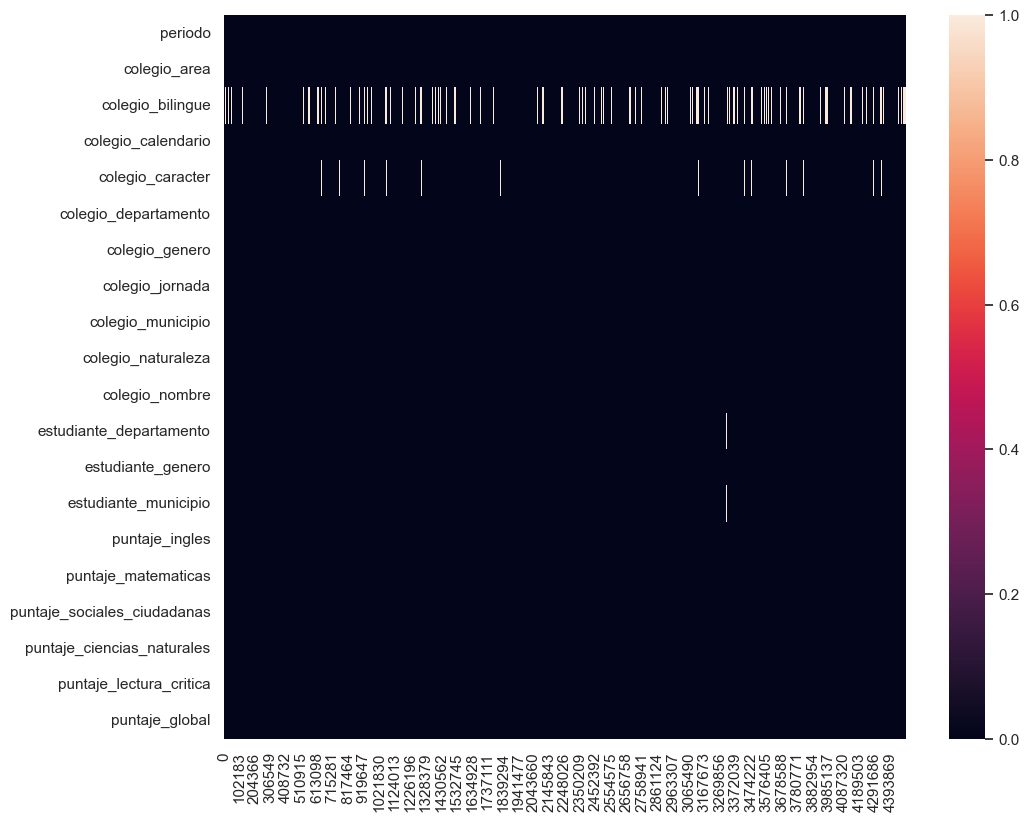

In [11]:
(
    raw_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

### Reemplazar los valores nulos

In [13]:
for column in categorical_columns:
    raw_df[column] = raw_df[column].cat.add_categories('Unknown').fillna('Unknown')

## Conteos y proporciones

### Variables numéricas

In [14]:
raw_df.describe(include=[np.number])

periodo  puntaje_ingles  puntaje_matematicas  \
count  4.496032e+06    4.496032e+06         4.496032e+06   
mean   2.018277e+04    5.031946e+01         5.074638e+01   
std    2.888245e+01    1.253735e+01         1.200815e+01   
min    2.014200e+04    0.000000e+00         0.000000e+00   
25%    2.016100e+04    4.100000e+01         4.200000e+01   
50%    2.018100e+04    4.900000e+01         5.000000e+01   
75%    2.019400e+04    5.700000e+01         5.900000e+01   
max    2.022400e+04    1.000000e+02         1.000000e+02   

       puntaje_sociales_ciudadanas  puntaje_ciencias_naturales  \
count                 4.496032e+06                4.496032e+06   
mean                  4.887499e+01                5.011418e+01   
std                   1.172866e+01                1.056860e+01   
min                   0.000000e+00                0.000000e+00   
25%                   4.000000e+01                4.200000e+01   
50%                   4.900000e+01                5.000000e+01   
75%                   5.700000e+01                5.700000e+01   
max                   1.000000e+02                1.000000e+02   

       puntaje_lectura_critica  puntaje_global  
count             4.496032e+06    4.496032e+06  
mean              5.219392e+01    2.523497e+02  
std               1.038307e+01    5.041334e+01  
min               0.000000e+00    0.000000e+00  
25%               4.500000e+01    2.150000e+02  
50%               5.200000e+01    2.490000e+02  
75%               6.000000e+01    2.870000e+02  
max               1.000000e+02    4.950000e+02

### Variables categóricas

In [15]:
raw_df.describe(include=['category'])

colegio_area colegio_bilingue colegio_calendario colegio_caracter  \
count       4496032          4496032            4496032          4496032   
unique            3                3                  4                5   
top          URBANO                N                  A        ACADÉMICO   
freq        3812544          3753198            4346491          2394305   

       colegio_departamento colegio_genero colegio_jornada colegio_municipio  \
count               4496032        4496032         4496032           4496032   
unique                   35              4               7              1411   
top               ANTIOQUIA          MIXTO          MAÑANA       BOGOTÁ D.C.   
freq                 594895        4334284         2105427            712616   

       colegio_naturaleza                  colegio_nombre  \
count             4496032                         4496032   
unique                  3                           11147   
top               OFICIAL  INSTITUCION EDUCATIVA SAN JOSE   
freq              3301328                           10909   

       estudiante_departamento estudiante_genero estudiante_municipio  
count                  4496032           4496032              4496032  
unique                      35                 3                 1038  
top                     BOGOTÁ                 F          BOGOTÁ D.C.  
freq                    720813           2445921               720813

### Conteos de variables categóricas

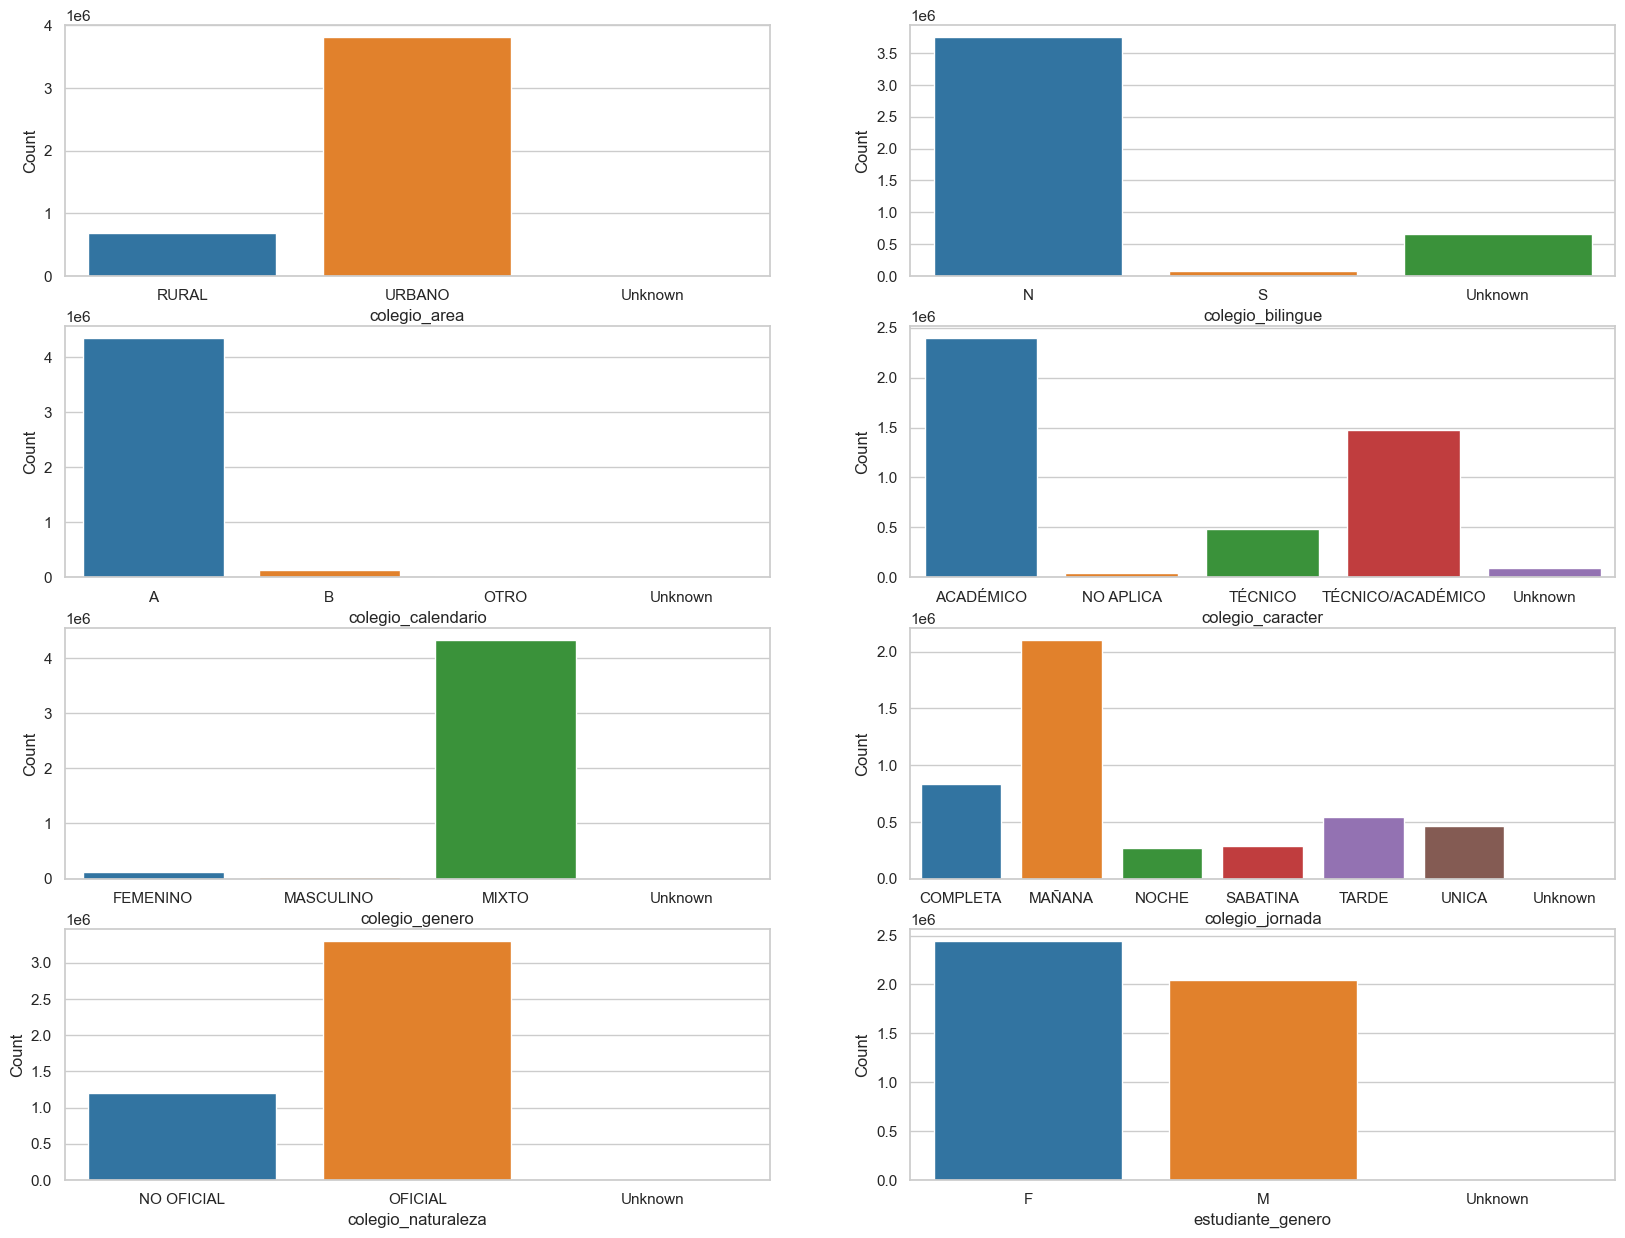

In [22]:
def plot_value_counts(column: str):
    return (
        raw_df
        .value_counts(column, sort=True)[:10]
        .reset_index(name='Count')
        .pipe(
            lambda df: (
                sns.barplot(
                    data=df,
                    x=column,
                    y='Count',
                    ax=plt.gca(),
                )
            )
        )
    )

plt.figure(figsize=(20, 15))
for i, column in enumerate(can_plot_categorical_columns, 1):
    plt.subplot(4, 2, i)
    plot_value_counts(column)

### Proporciones de variables categóricas

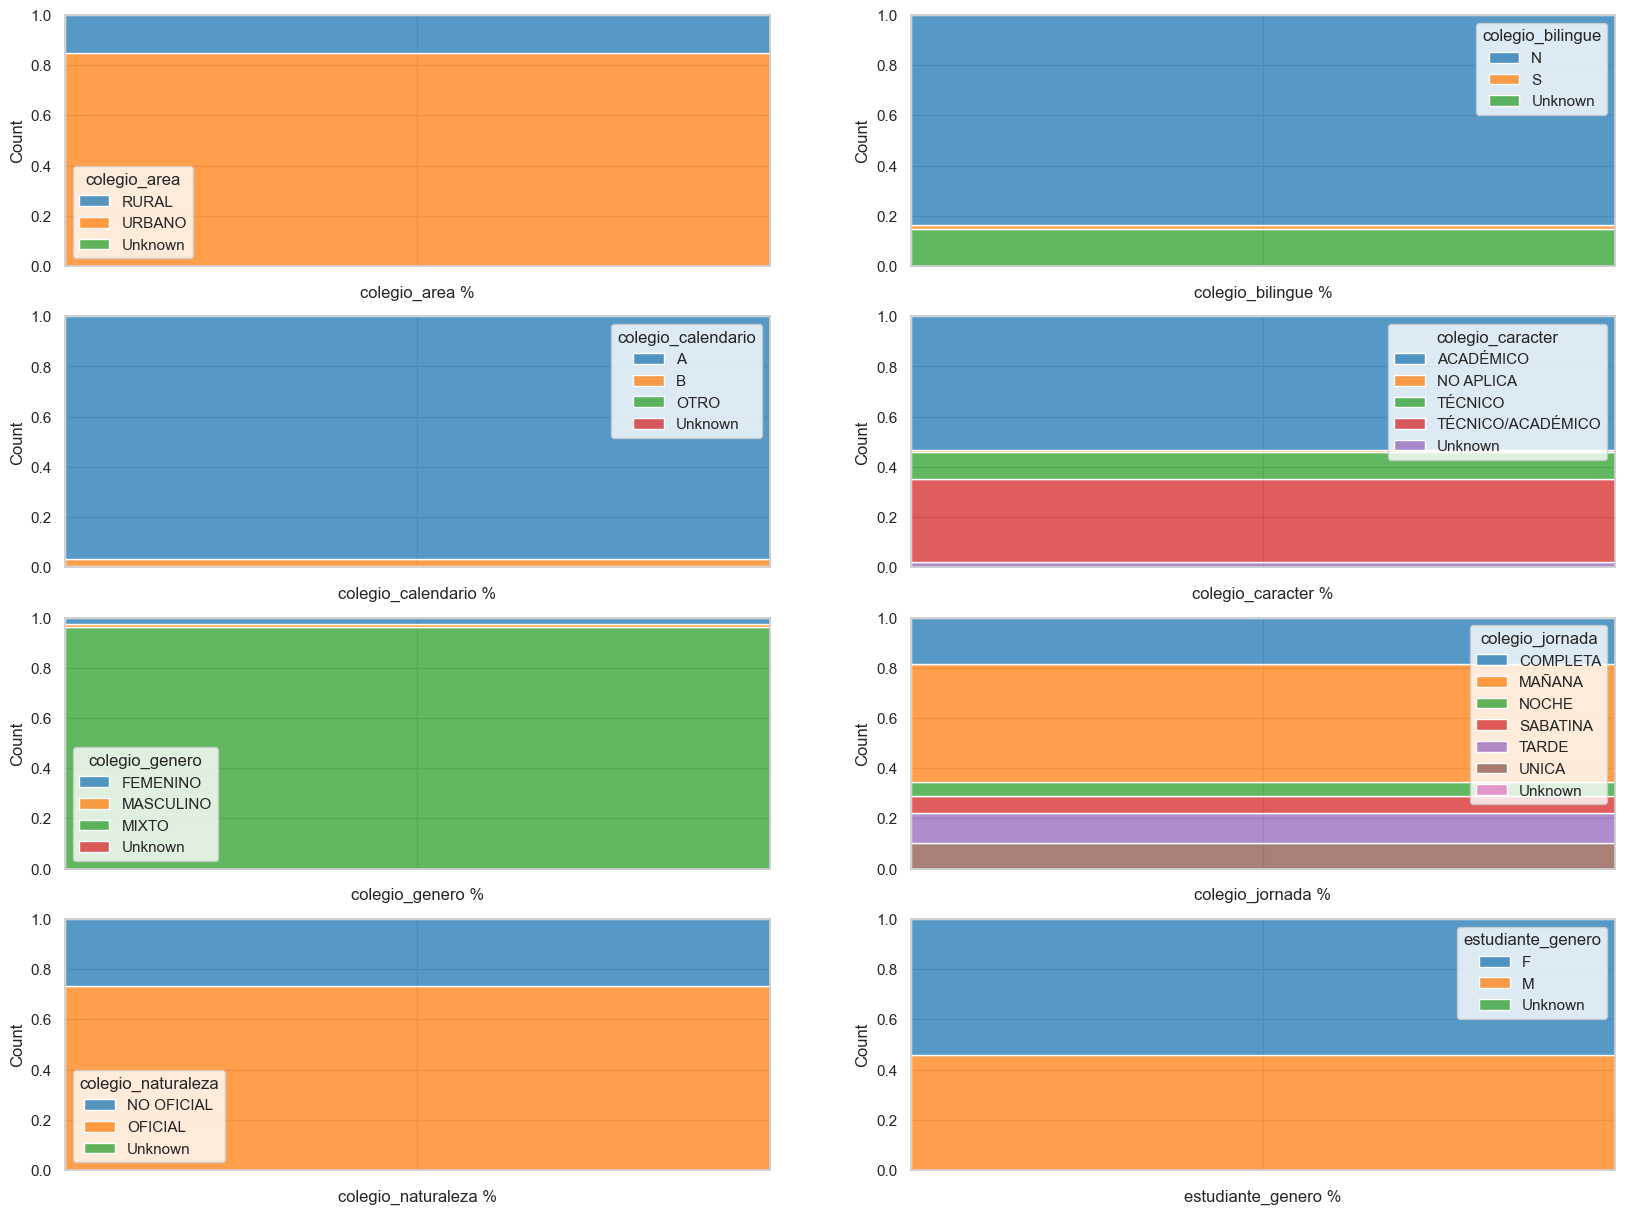

In [24]:
def plot_value_proportions(column: str):
    return (
        raw_df
        .add_column(f'{column} %', '')
        .pipe(
            lambda df: (
                sns.histplot(
                    data=df,
                    x=f'{column} %',
                    hue=column,
                    multiple='fill',
                    ax=plt.gca(),
                )
            )
        )
    )

plt.figure(figsize=(20, 15))
for i, column in enumerate(can_plot_categorical_columns, 1):
    plt.subplot(4, 2, i)
    plot_value_proportions(column)

## Medidas de tendencia central

### Promedio

In [25]:
raw_df.mean(numeric_only=True)

periodo                        20182.766176
puntaje_ingles                    50.319464
puntaje_matematicas               50.746379
puntaje_sociales_ciudadanas       48.874990
puntaje_ciencias_naturales        50.114184
puntaje_lectura_critica           52.193921
puntaje_global                   252.349692
dtype: float64

### Mediana

In [26]:
raw_df.median(numeric_only=True)

periodo                        20181.0
puntaje_ingles                    49.0
puntaje_matematicas               50.0
puntaje_sociales_ciudadanas       49.0
puntaje_ciencias_naturales        50.0
puntaje_lectura_critica           52.0
puntaje_global                   249.0
dtype: float64

### Moda

In [27]:
raw_df.mode()

periodo colegio_area colegio_bilingue colegio_calendario colegio_caracter  \
0    20194       URBANO                N                  A        ACADÉMICO   

  colegio_departamento colegio_genero colegio_jornada colegio_municipio  \
0            ANTIOQUIA          MIXTO          MAÑANA       BOGOTÁ D.C.   

  colegio_naturaleza                  colegio_nombre estudiante_departamento  \
0            OFICIAL  INSTITUCION EDUCATIVA SAN JOSE                  BOGOTÁ   

  estudiante_genero estudiante_municipio  puntaje_ingles  puntaje_matematicas  \
0                 F          BOGOTÁ D.C.            49.0                 50.0   

   puntaje_sociales_ciudadanas  puntaje_ciencias_naturales  \
0                         50.0                        47.0   

   puntaje_lectura_critica  puntaje_global  
0                     54.0           237.0

## Medidas de dispersión

### ¿Cuál es el rango de las variables?

In [28]:
(
    raw_df
    .select_dtypes(include=[np.number])
    .quantile(q=[0,1])
    .transpose()
    .rename_axis('metric')
    .rename(columns={0: 'min', 1: 'max'})
    .assign(
        range = lambda df: df['max'] - df['min']
    )
)

min      max  range
metric                                              
periodo                      20142.0  20224.0   82.0
puntaje_ingles                   0.0    100.0  100.0
puntaje_matematicas              0.0    100.0  100.0
puntaje_sociales_ciudadanas      0.0    100.0  100.0
puntaje_ciencias_naturales       0.0    100.0  100.0
puntaje_lectura_critica          0.0    100.0  100.0
puntaje_global                   0.0    495.0  495.0

### ¿Cuál es la desviación estándar de las variables?

In [29]:
raw_df.std(numeric_only=True)

periodo                        28.882449
puntaje_ingles                 12.537352
puntaje_matematicas            12.008154
puntaje_sociales_ciudadanas    11.728664
puntaje_ciencias_naturales     10.568603
puntaje_lectura_critica        10.383070
puntaje_global                 50.413337
dtype: float64

### ¿Cuál es el rango intercuartílico?

In [30]:
(
    raw_df
    .select_dtypes(include=[np.number])
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('metric')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

metric     0.75      0.5     0.25   iqr
0                      periodo  20194.0  20181.0  20161.0  33.0
1               puntaje_ingles     57.0     49.0     41.0  16.0
2          puntaje_matematicas     59.0     50.0     42.0  17.0
3  puntaje_sociales_ciudadanas     57.0     49.0     40.0  17.0
4   puntaje_ciencias_naturales     57.0     50.0     42.0  15.0
5      puntaje_lectura_critica     60.0     52.0     45.0  15.0
6               puntaje_global    287.0    249.0    215.0  72.0

## Distribuciones

### Histogramas

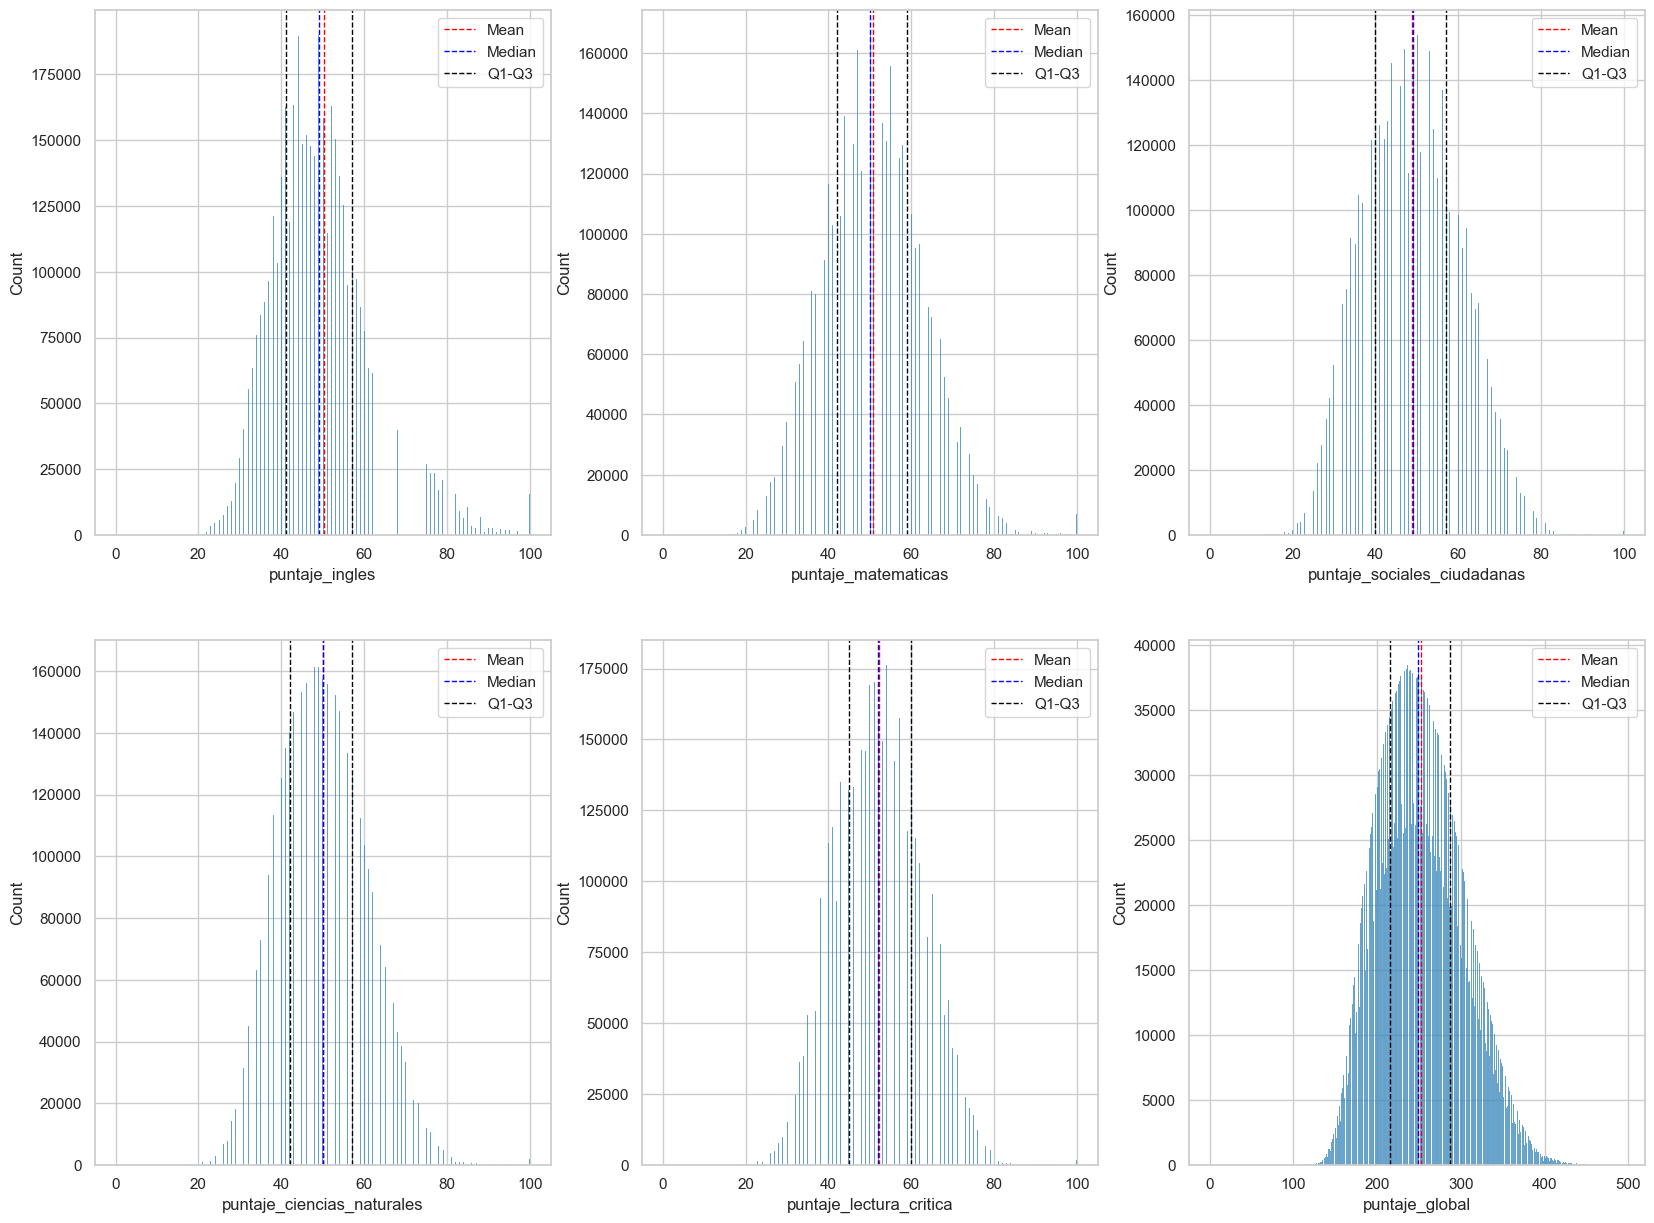

In [32]:
def plot_histogram_with_stats(column: str) -> None:
    """Plot histogram with mean, median, Q1-Q3."""

    sns.histplot(
        data=raw_df,
        x=column,
    )

    plt.axvline(
        x=raw_df[column].mean(),
        color='red',
        linestyle='dashed',
        linewidth=1,
    )

    plt.axvline(
        x=raw_df[column].median(),
        color='blue',
        linestyle='dashed',
        linewidth=1,
    )

    plt.axvline(
        x=raw_df[column].quantile(0.25),
        color='black',
        linestyle='dashed',
        linewidth=1,
    )

    plt.axvline(
        x=raw_df[column].quantile(0.75),
        color='black',
        linestyle='dashed',
        linewidth=1,
    )
    
    plt.legend(['Mean', 'Median', 'Q1-Q3'])


plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_histogram_with_stats(column)

### Diagramas de cajas

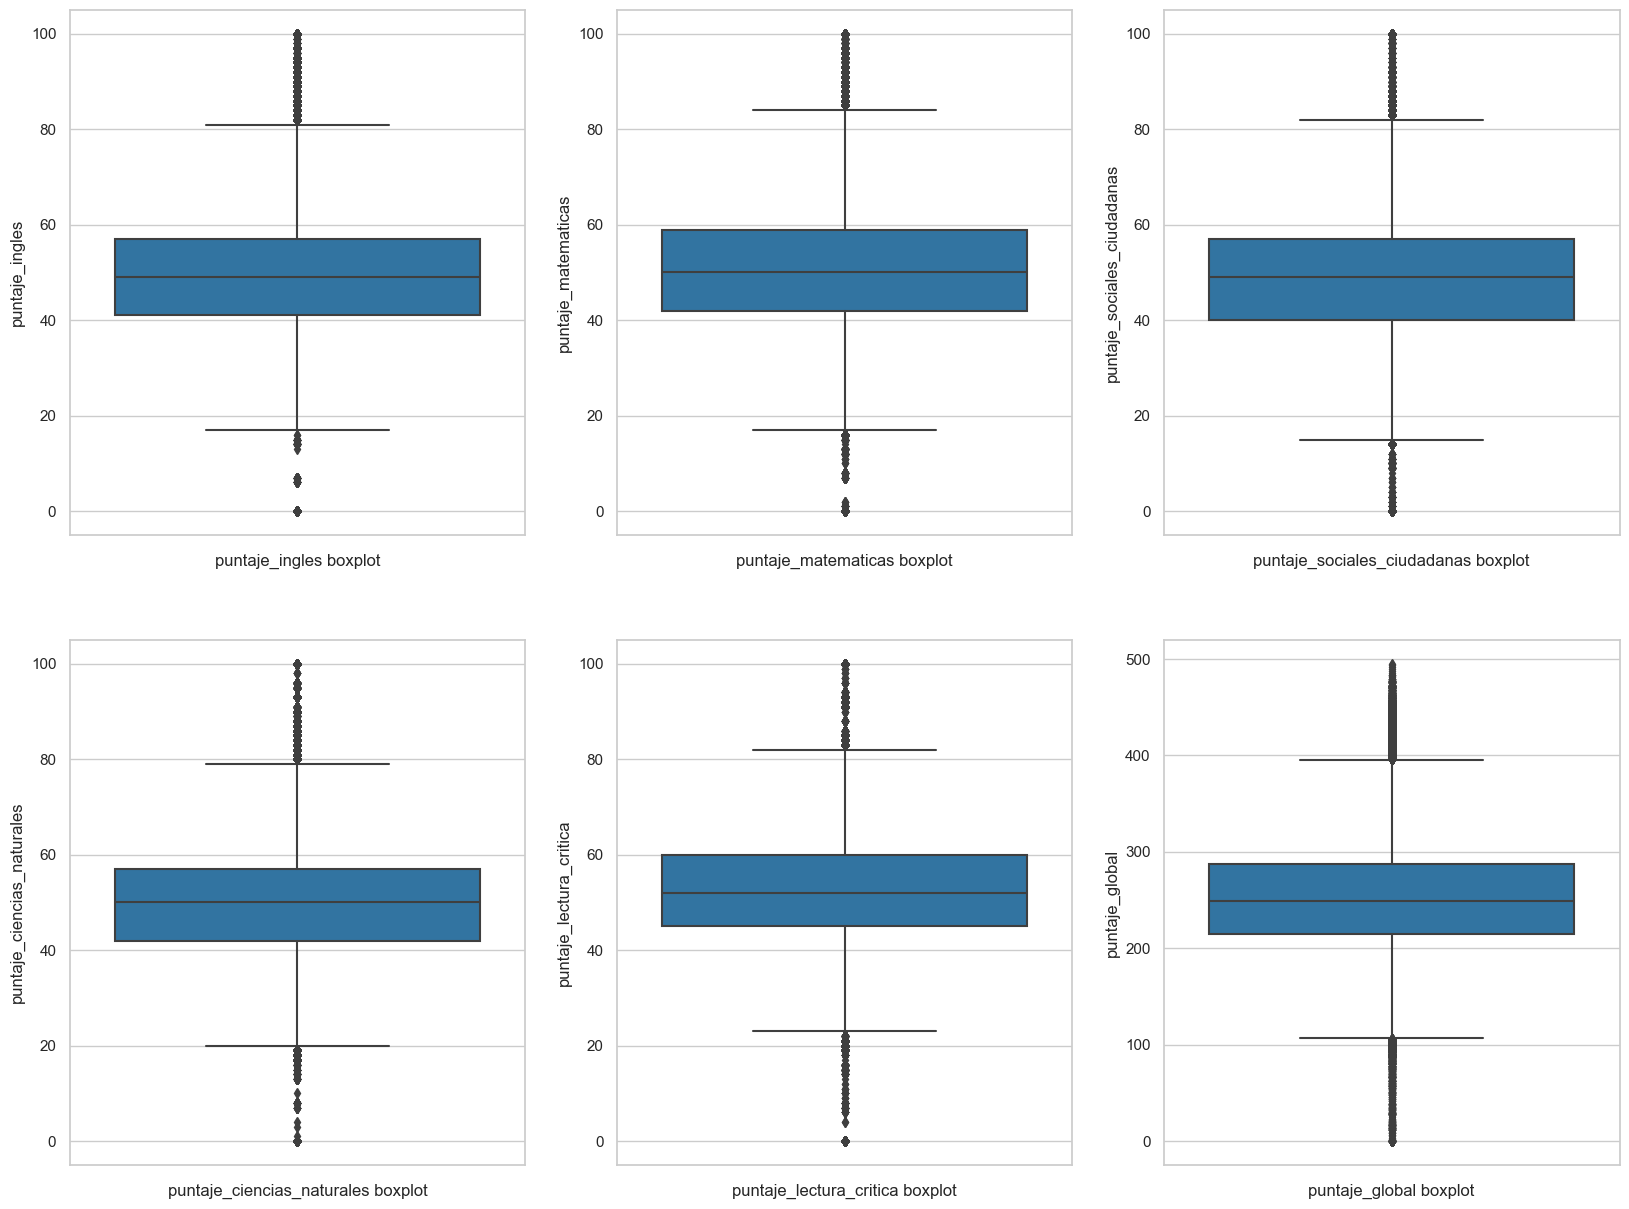

In [33]:
def plot_column_boxplot(column: str, label: str) -> None:
    assert column != label, "Column and label must be different."
    return (
        raw_df
        .add_column(label, '')
        .pipe(
            lambda df: (
                sns.boxplot(
                    data=df,
                    x=label,
                    y=column,
                    ax=plt.gca(),
                )
            )
        )
    )

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_column_boxplot(column, column + ' boxplot')

### Funciones empíricas de masas de probabilidad (PMFs)

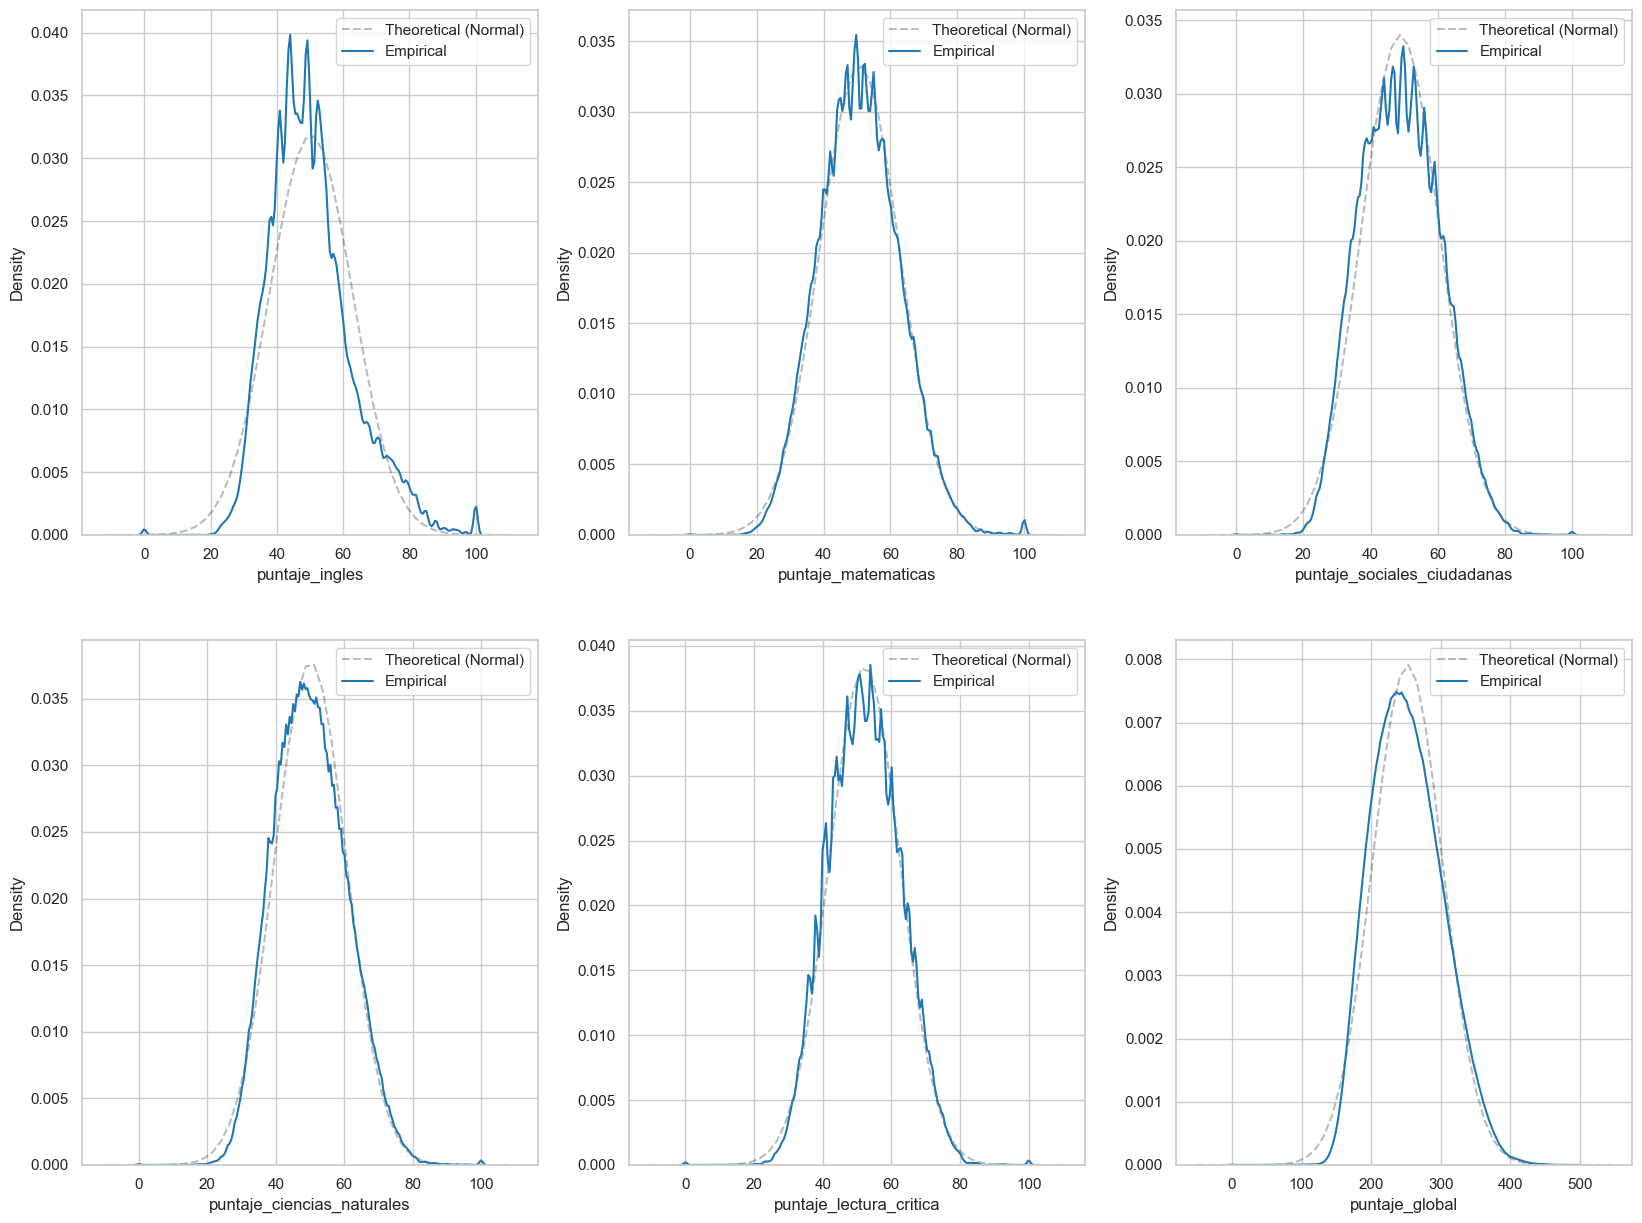

In [34]:
def plot_empirical_pmf(column: str) -> None:
    """Assumes the column is normally distributed."""
    stats = raw_df[column].describe()
    distr = scipy.stats.norm(stats['mean'], stats['std']).pdf
    xs = np.linspace(stats['min'] - stats['std'], stats['max'] + stats['std'])

    ys = distr(xs)
    plt.plot(xs, ys, color='#00000044', linestyle='dashed')

    sns.kdeplot(
        data=raw_df,
        x=column
    )

    plt.legend([f'Theoretical (Normal)', 'Empirical'])


plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_empirical_pmf(column)

### Funciones empirícas de probabilidad acumulada (CDFs)

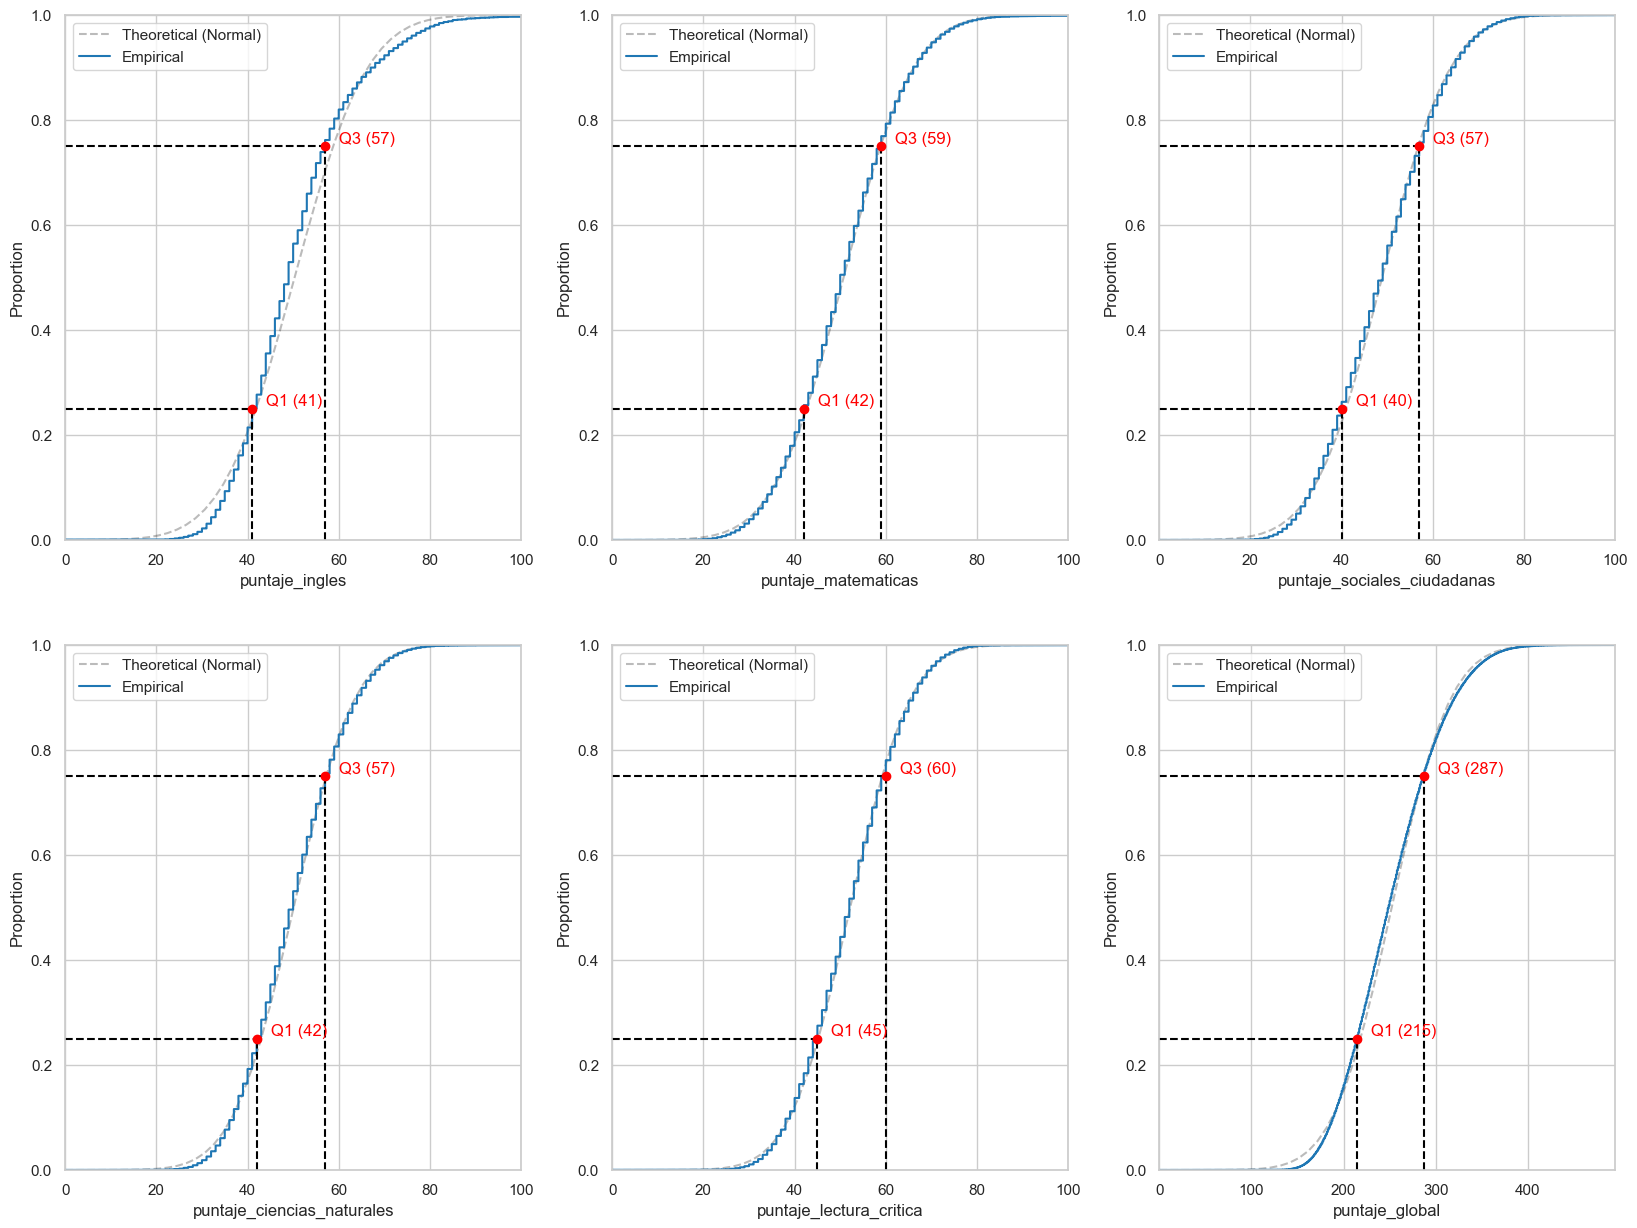

In [35]:
def plot_empirical_cdf(column: str, highlight_quartiles = False) -> None:
    np.random.seed(42)
    stats = raw_df[column].describe()
    distr = scipy.stats.norm(stats['mean'], stats['std']).cdf
    xs = np.linspace(stats['min'], stats['max'])

    ys = distr(xs)
    plt.plot(xs, ys, color='#00000044', linestyle='dashed')

    empirical_cdf = empiricaldist.Cdf.from_seq(
        raw_df[column],
        normalize=True
    )

    empirical_pmf = empiricaldist.Pmf.from_seq(
        raw_df[column],
        normalize=True
    )
    
    sns.ecdfplot(
        data=raw_df,
        x=column,
    )

    if highlight_quartiles:

        ps = [0.25, 0.75]
        qs = empirical_cdf.inverse(ps)

        plt.vlines(
            x=qs,
            ymin=0,
            ymax=ps,
            color = 'black',
            linestyle='dashed'
        )

        plt.hlines(
            y=ps,
            xmin=empirical_pmf.qs[0],
            xmax=qs,
            color='black',
            linestyle='dashed'
        )

        plt.scatter(
            x=qs,
            y=ps,
            color='red',
            zorder=2
        )

        plt.text(
            x=qs[0],
            y=ps[0],
            s=(' '*3) + f'Q1 ({qs[0]:.0f})',
            ha='left',
            va='bottom',
            color='red'
        )

        plt.text(
            x=qs[1],
            y=ps[1],
            s=(' '*3) + f'Q3 ({qs[1]:.0f})',
            ha='left',
            va='bottom',
            color='red'
        )

        plt.xlim(empirical_pmf.qs[0], empirical_pmf.qs[-1])
        plt.ylim(0, 1)

    plt.legend([f'Theoretical (Normal)', 'Empirical'])


plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_empirical_cdf(column, highlight_quartiles=True)

### Distribuciones según naturaleza del colegio

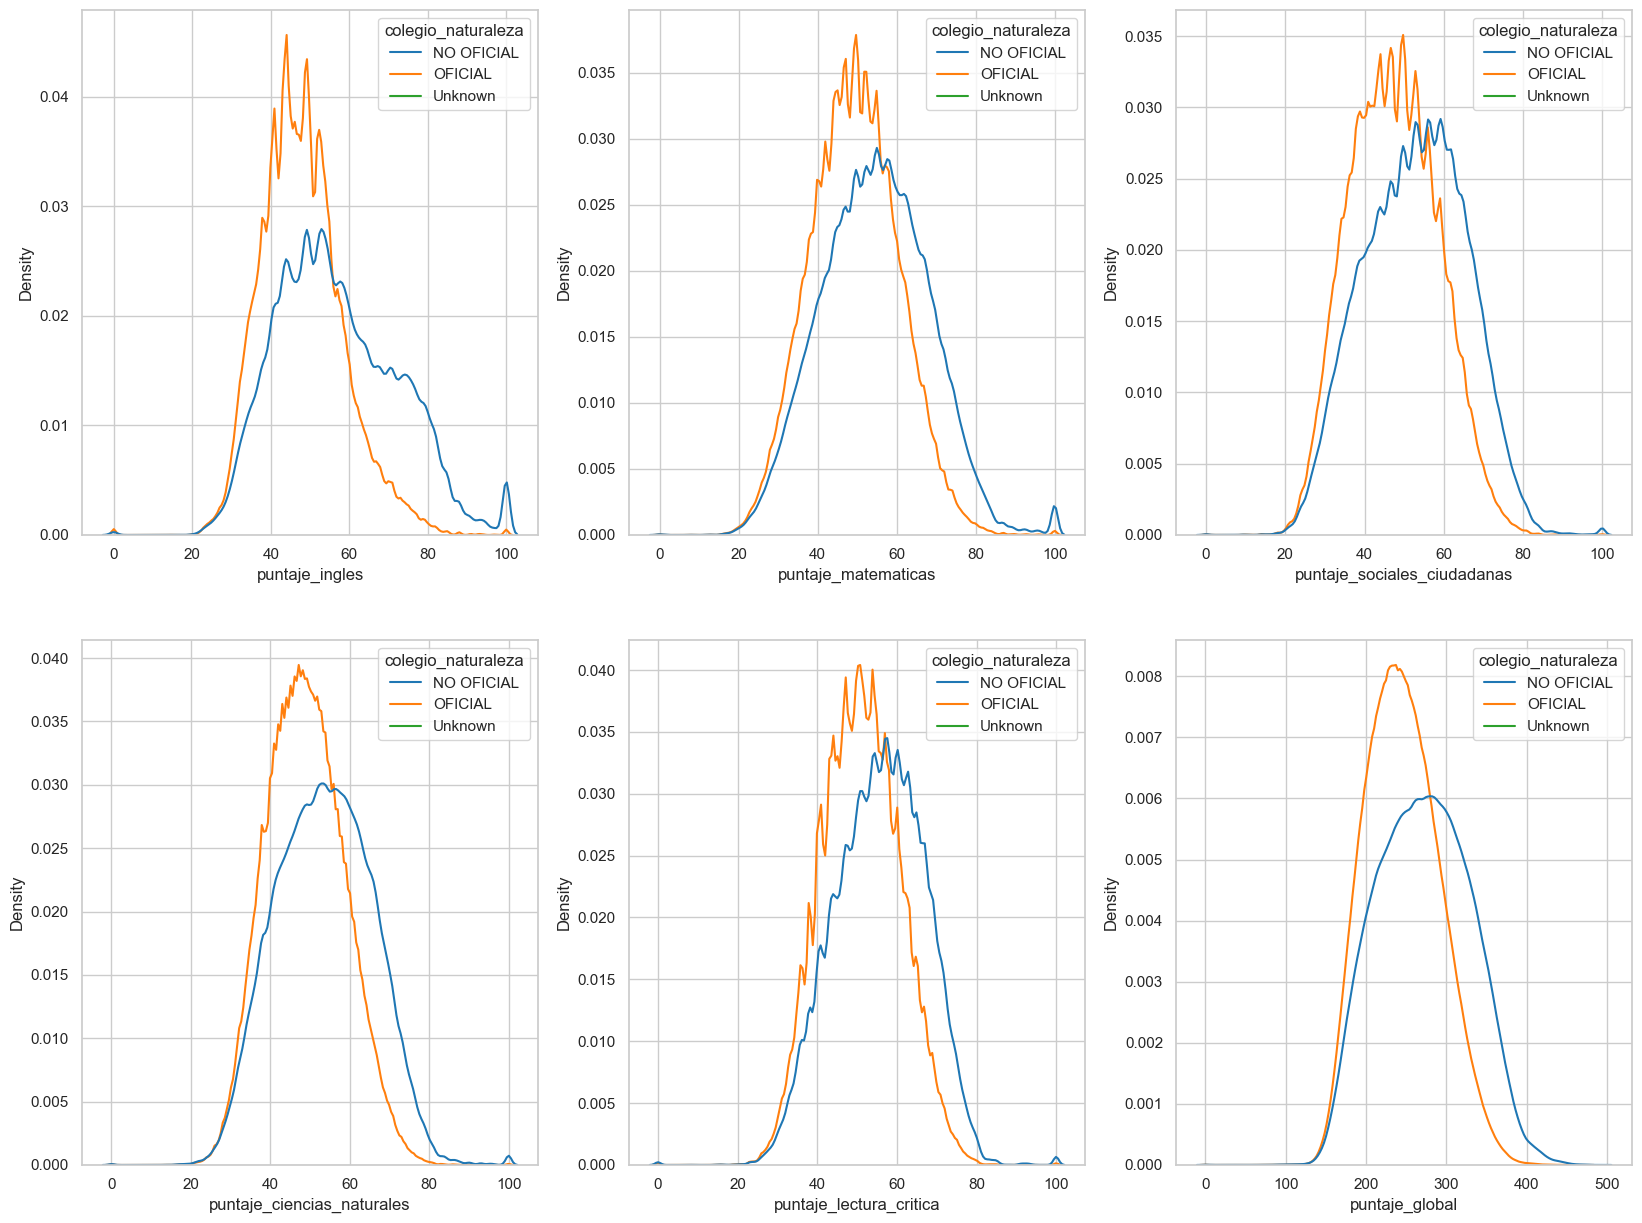

In [36]:
def plot_pmf_by_default_behavior(column: str) -> None:
    sns.kdeplot(
        data=raw_df,
        x=column,
        hue='colegio_naturaleza',
        common_norm=False,
    )

def plot_cdf_by_default_behavior(column: str) -> None:
    sns.ecdfplot(
        data=raw_df,
        x=column,
        hue='colegio_naturaleza',
    )

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_pmf_by_default_behavior(column)

## Matrices de correlación

### ¿Existe una correlación lineal entre alguna de nuestras variables?

In [4]:
raw_df['estudiante_hombre'] = (raw_df['estudiante_genero'] == 'M').astype(int)
raw_df['colegio_bogota'] = (raw_df['colegio_municipio'] == 'BOGOTÁ D.C.').astype(int)
raw_df['colegio_publico'] = (raw_df['colegio_naturaleza'] == 'OFICIAL').astype(int)
raw_df['colegio_urbano'] = (raw_df['colegio_area'] == 'URBANO').astype(int)

In [49]:
raw_df.corr(numeric_only=True)

periodo  puntaje_ingles  puntaje_matematicas  \
periodo                      1.000000       -0.027102             0.016835   
puntaje_ingles              -0.027102        1.000000             0.668926   
puntaje_matematicas          0.016835        0.668926             1.000000   
puntaje_sociales_ciudadanas -0.098240        0.676415             0.731527   
puntaje_ciencias_naturales  -0.072143        0.696399             0.790412   
puntaje_lectura_critica      0.084254        0.667792             0.735640   
puntaje_global              -0.021769        0.788184             0.901187   
estudiante_hombre            0.007009        0.040330             0.137582   
colegio_bogota              -0.023969        0.186912             0.147408   
colegio_publico              0.018293       -0.309390            -0.193877   
colegio_urbano              -0.030264        0.145460             0.135369   

                             puntaje_sociales_ciudadanas  \
periodo                                        -0.098240   
puntaje_ingles                                  0.676415   
puntaje_matematicas                             0.731527   
puntaje_sociales_ciudadanas                     1.000000   
puntaje_ciencias_naturales                      0.787810   
puntaje_lectura_critica                         0.776304   
puntaje_global                                  0.909220   
estudiante_hombre                               0.045415   
colegio_bogota                                  0.151193   
colegio_publico                                -0.204552   
colegio_urbano                                  0.135162   

                             puntaje_ciencias_naturales  \
periodo                                       -0.072143   
puntaje_ingles                                 0.696399   
puntaje_matematicas                            0.790412   
puntaje_sociales_ciudadanas                    0.787810   
puntaje_ciencias_naturales                     1.000000   
puntaje_lectura_critica                        0.741845   
puntaje_global                                 0.913487   
estudiante_hombre                              0.096862   
colegio_bogota                                 0.154537   
colegio_publico                               -0.196645   
colegio_urbano                                 0.123051   

                             puntaje_lectura_critica  puntaje_global  \
periodo                                     0.084254       -0.021769   
puntaje_ingles                              0.667792        0.788184   
puntaje_matematicas                         0.735640        0.901187   
puntaje_sociales_ciudadanas                 0.776304        0.909220   
puntaje_ciencias_naturales                  0.741845        0.913487   
puntaje_lectura_critica                     1.000000        0.891513   
puntaje_global                              0.891513        1.000000   
estudiante_hombre                           0.012277        0.080210   
colegio_bogota                              0.144440        0.170686   
colegio_publico                            -0.199750       -0.232825   
colegio_urbano                              0.151818        0.153244   

                             estudiante_hombre  colegio_bogota  \
periodo                               0.007009       -0.023969   
puntaje_ingles                        0.040330        0.186912   
puntaje_matematicas                   0.137582        0.147408   
puntaje_sociales_ciudadanas           0.045415        0.151193   
puntaje_ciencias_naturales            0.096862        0.154537   
puntaje_lectura_critica               0.012277        0.144440   
puntaje_global                        0.080210        0.170686   
estudiante_hombre                     1.000000        0.013645   
colegio_bogota                        0.013645        1.000000   
colegio_publico                      -0.044830       -0.203635   
colegio_urbano                       -0.007416        0.172935   

     

### Mapa de calor de correlaciones

<Axes: >

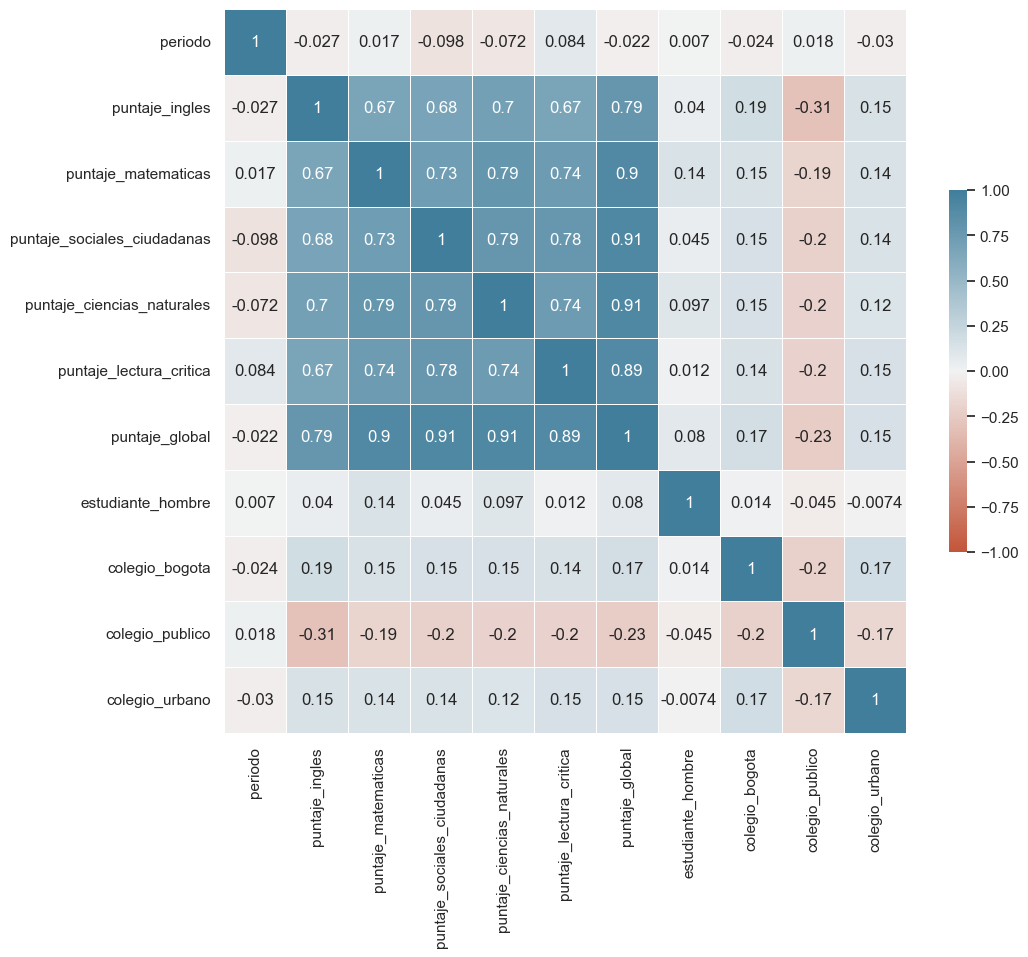

In [50]:
sns.heatmap(
    data=raw_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

### ¿Qué variables están más correlacionadas? Jerarquía de correlaciones

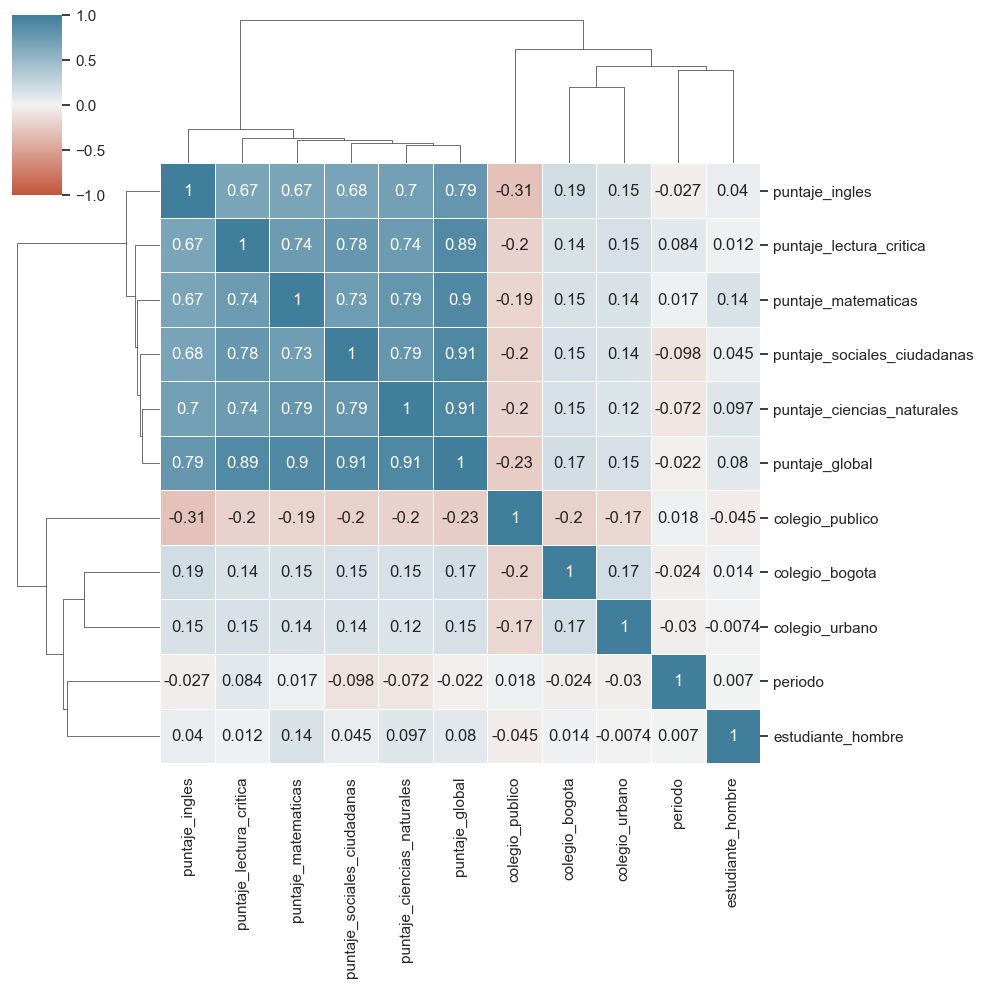

In [51]:
sns.clustermap(
    data=raw_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## Relaciones entre variables

### Gráfica de puntos

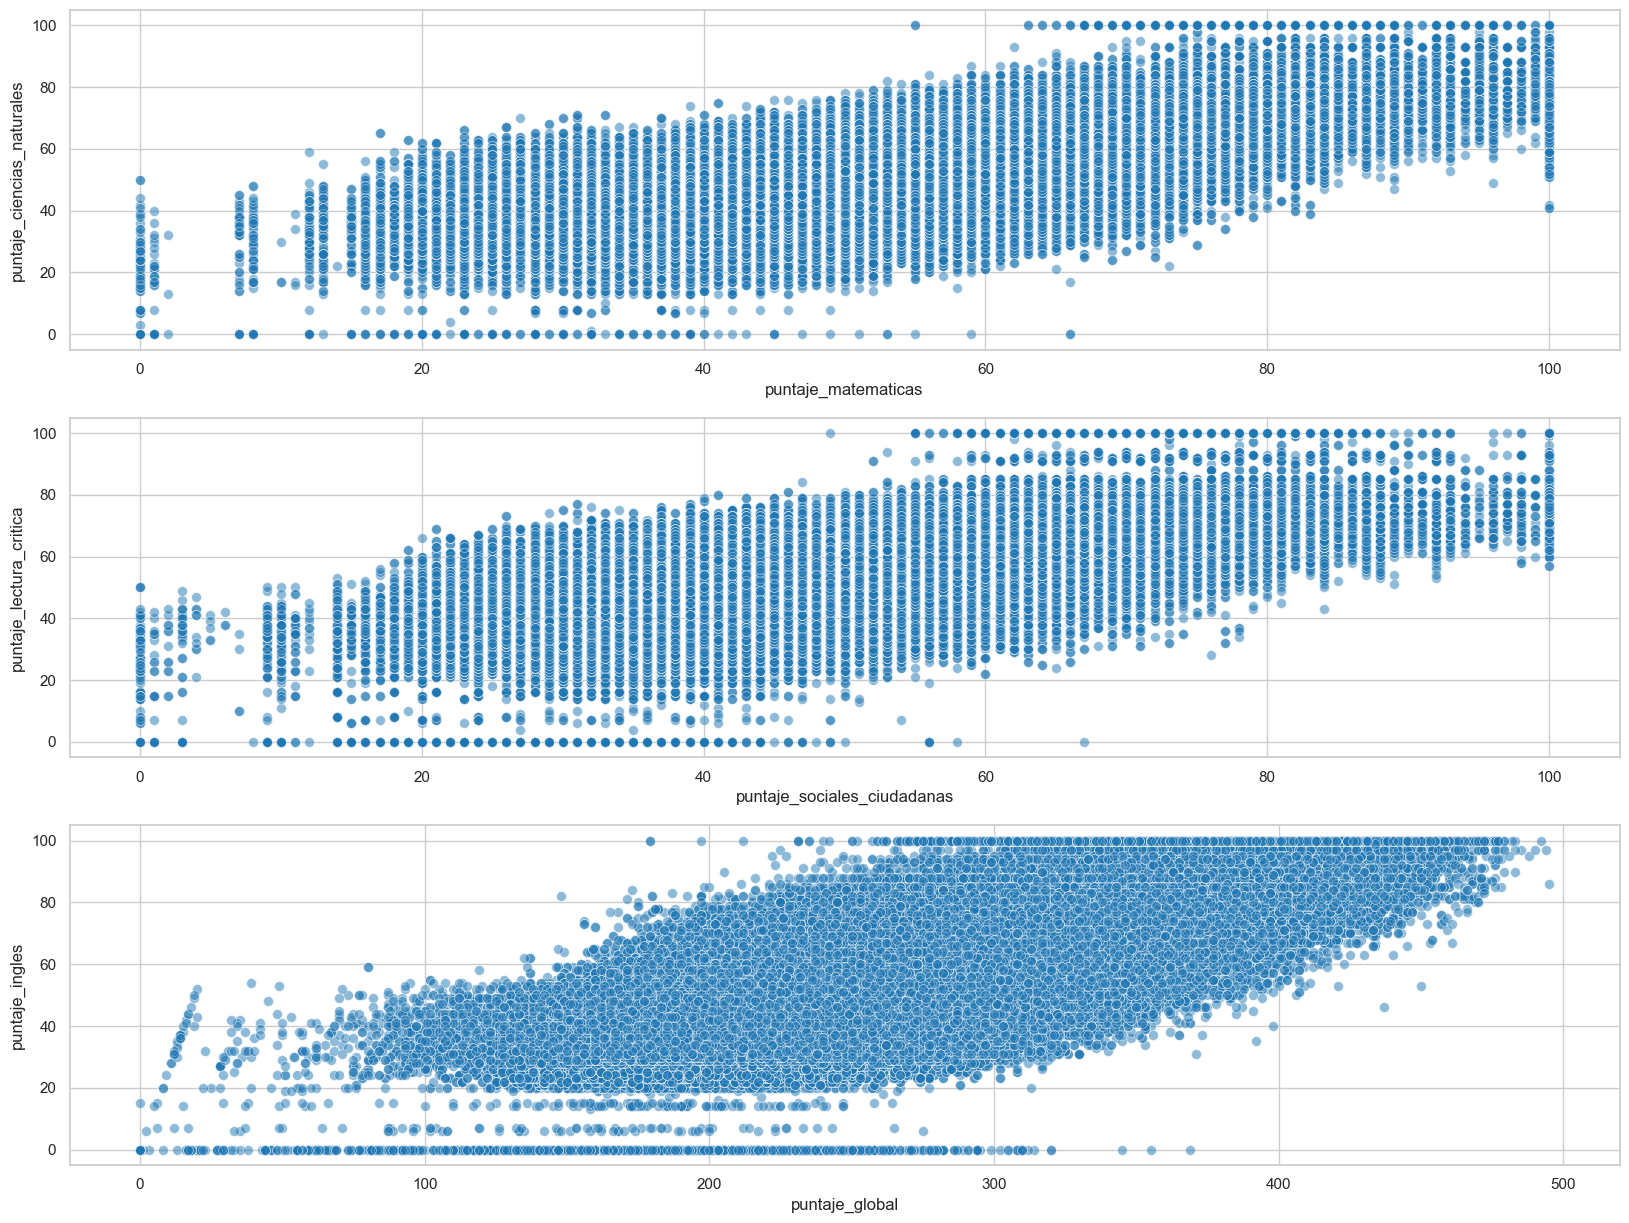

In [54]:
def plot_scatter_between_numerics(x_column: str, y_column: str, kind: str) -> None:
    match kind:
        case 'scatter':
            sns.scatterplot(
                data=raw_df,
                x=x_column,
                y=y_column,
                alpha=1/2,
                s=50,
                ax=plt.gca(),
            )
        case 'area':
            sns.displot(
                aspect=2,
                height=5,
                data=raw_df,
                x=x_column,
                y=y_column,
                alpha=1/2,
                rug=True
            )
        case 'contour':
            sns.displot(
                aspect=2,
                height=5,
                data=raw_df,
                x=x_column,
                y=y_column,
                alpha=1/2,
                kind='kde',
                rug=True
            )
        case 'joint':
            sns.jointplot(
                height=5,
                data=raw_df,
                x=x_column,
                y=y_column,
                marginal_kws=dict(bins=25, fill=False)
            )
        case 'hex':
            sns.jointplot(
                height=5,
                data=raw_df,
                x=x_column,
                y=y_column,
                kind='hex'
            )
        case 'reg':
            sns.lmplot(
                height=5,
                data=raw_df,
                x=x_column,
                y=y_column,
                hue='colegio_naturaleza',
                scatter_kws={'s': 10},
                aspect=2,
            )

plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
plot_scatter_between_numerics('puntaje_matematicas', 'puntaje_ciencias_naturales', 'scatter')
plt.subplot(3, 1, 2)
plot_scatter_between_numerics('puntaje_sociales_ciudadanas', 'puntaje_lectura_critica', 'scatter')
plt.subplot(3, 1, 3)
plot_scatter_between_numerics('puntaje_global', 'puntaje_ingles', 'scatter')

### Gráficos de violín y boxplots

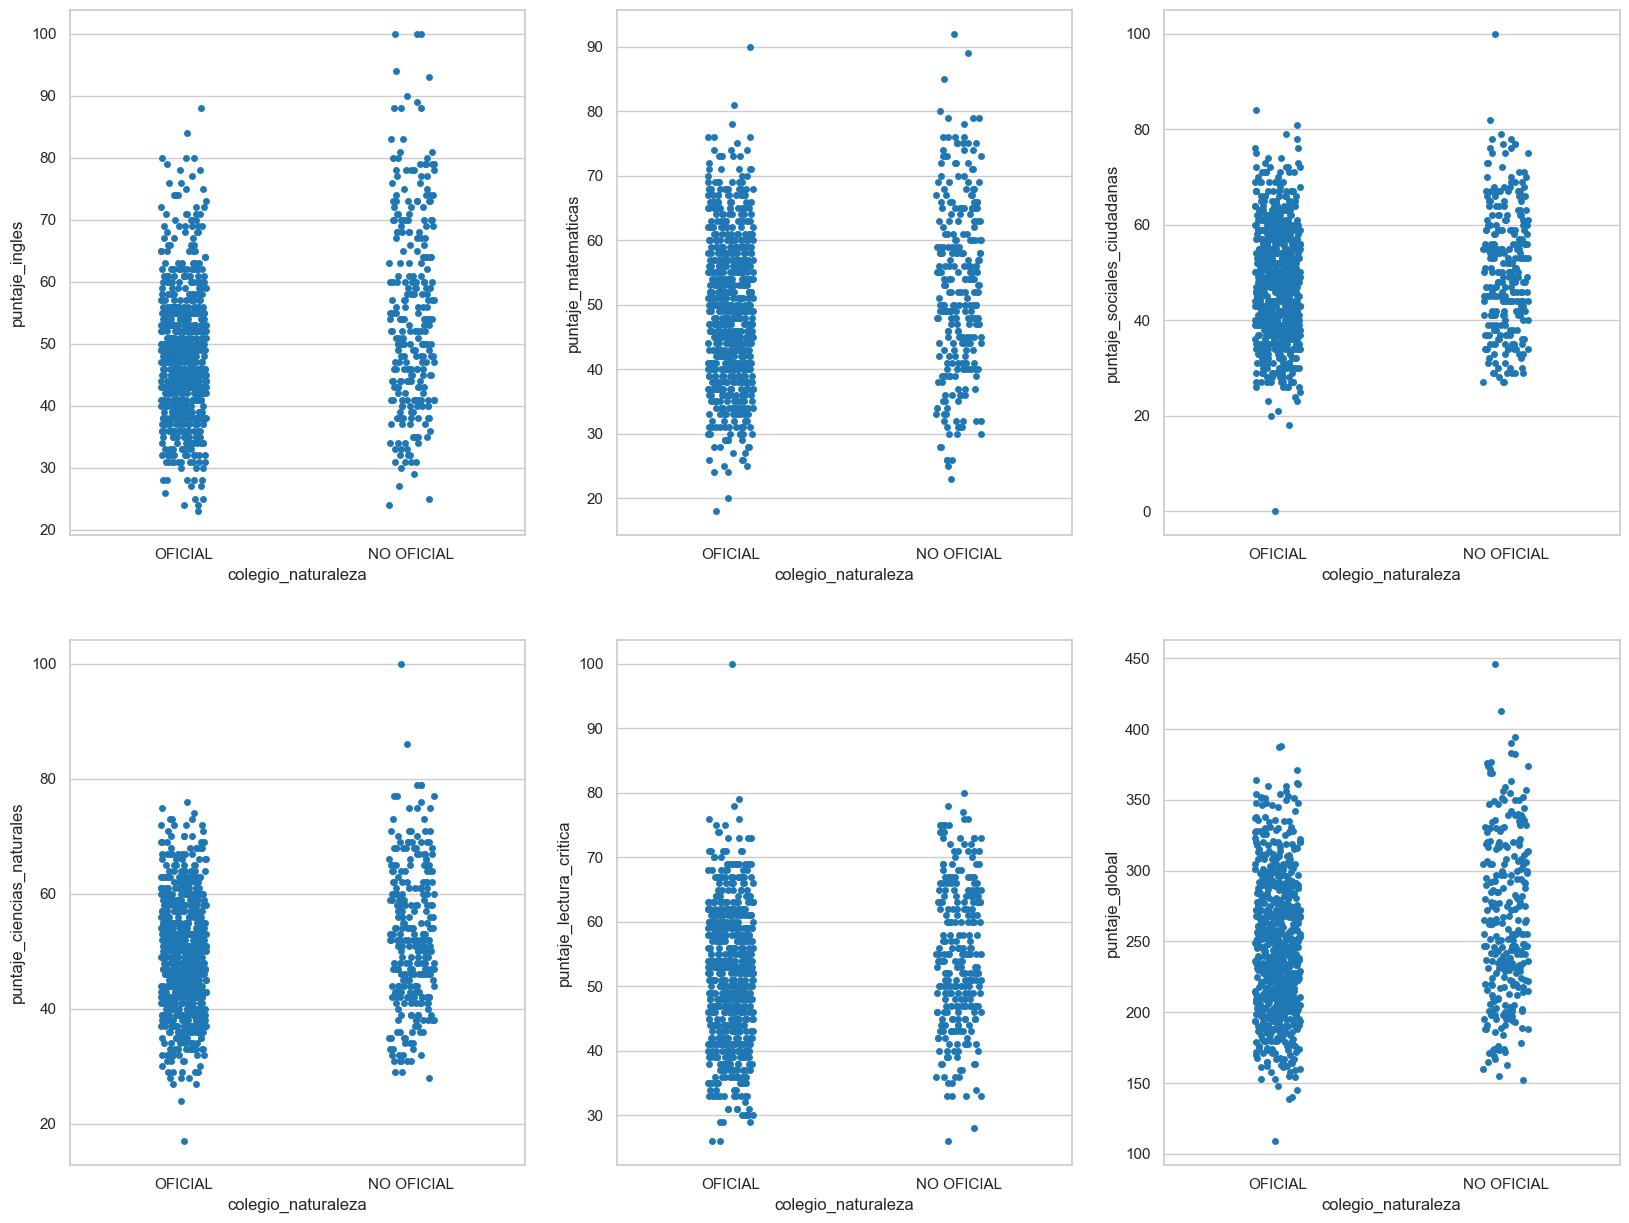

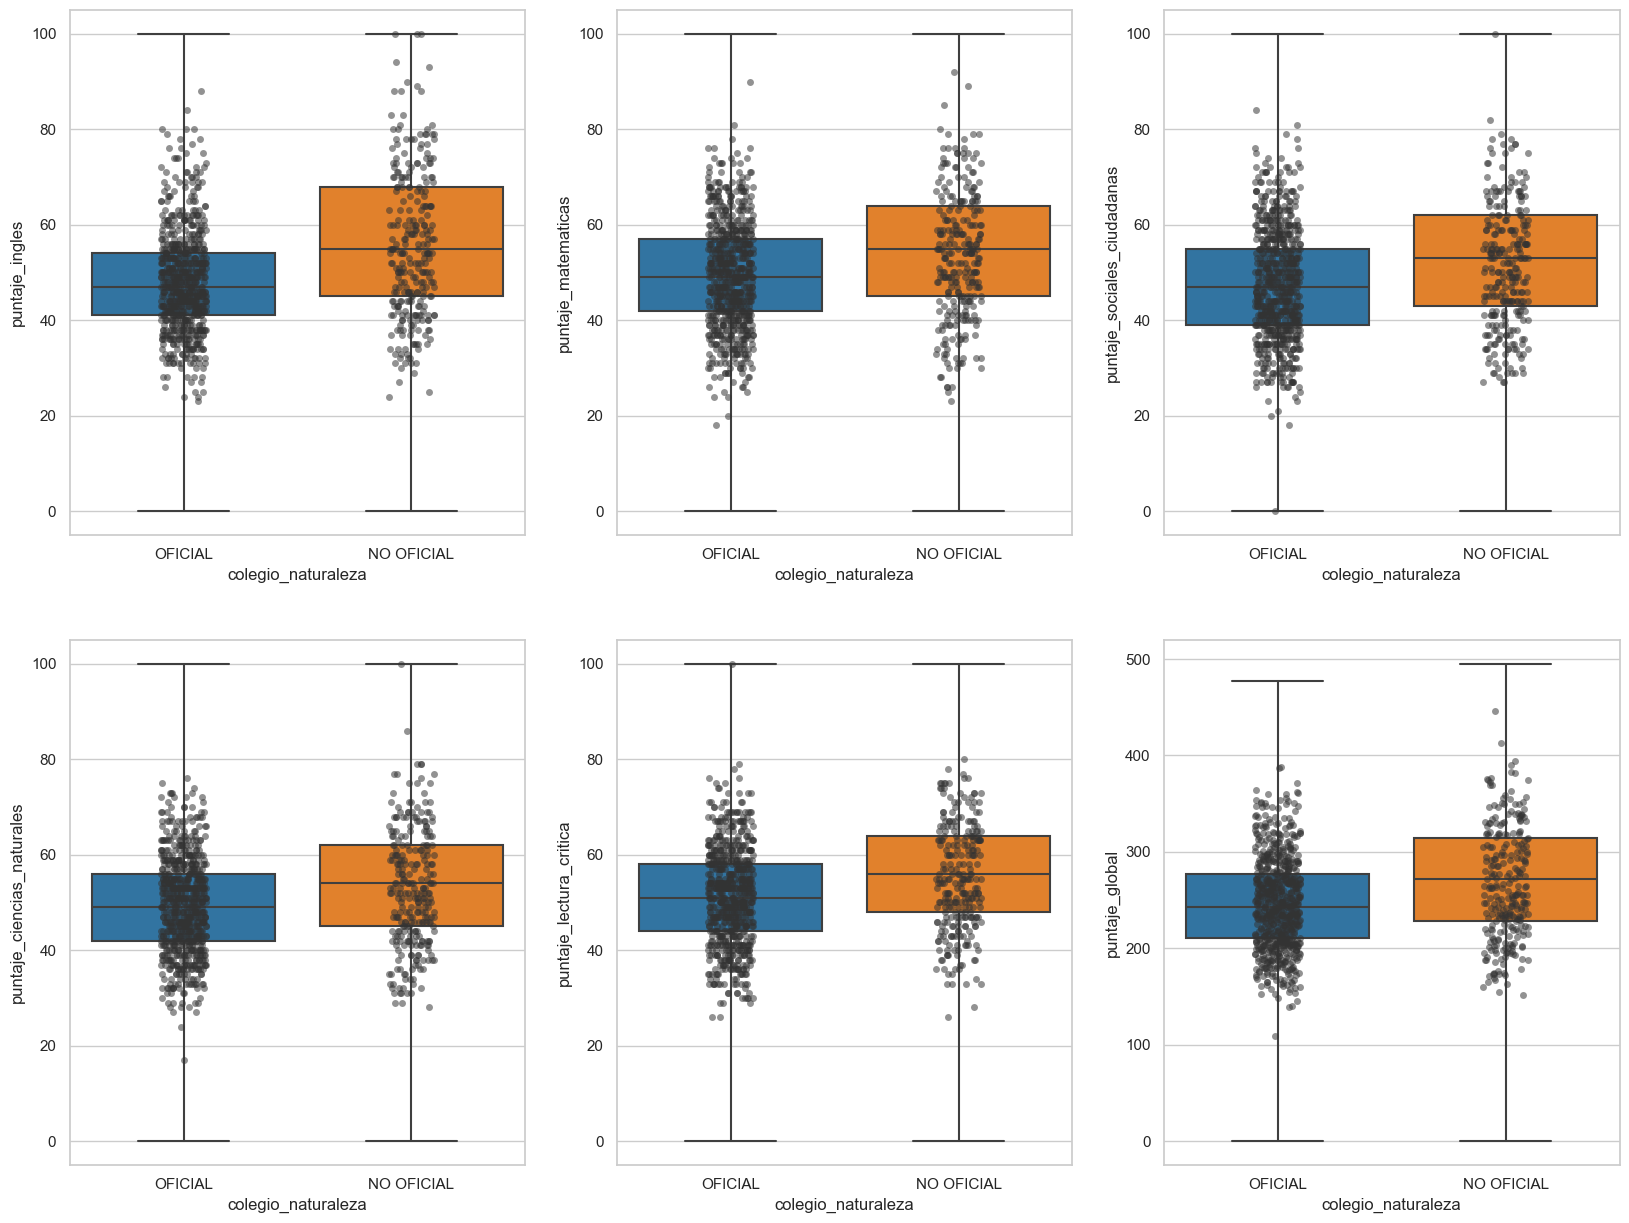

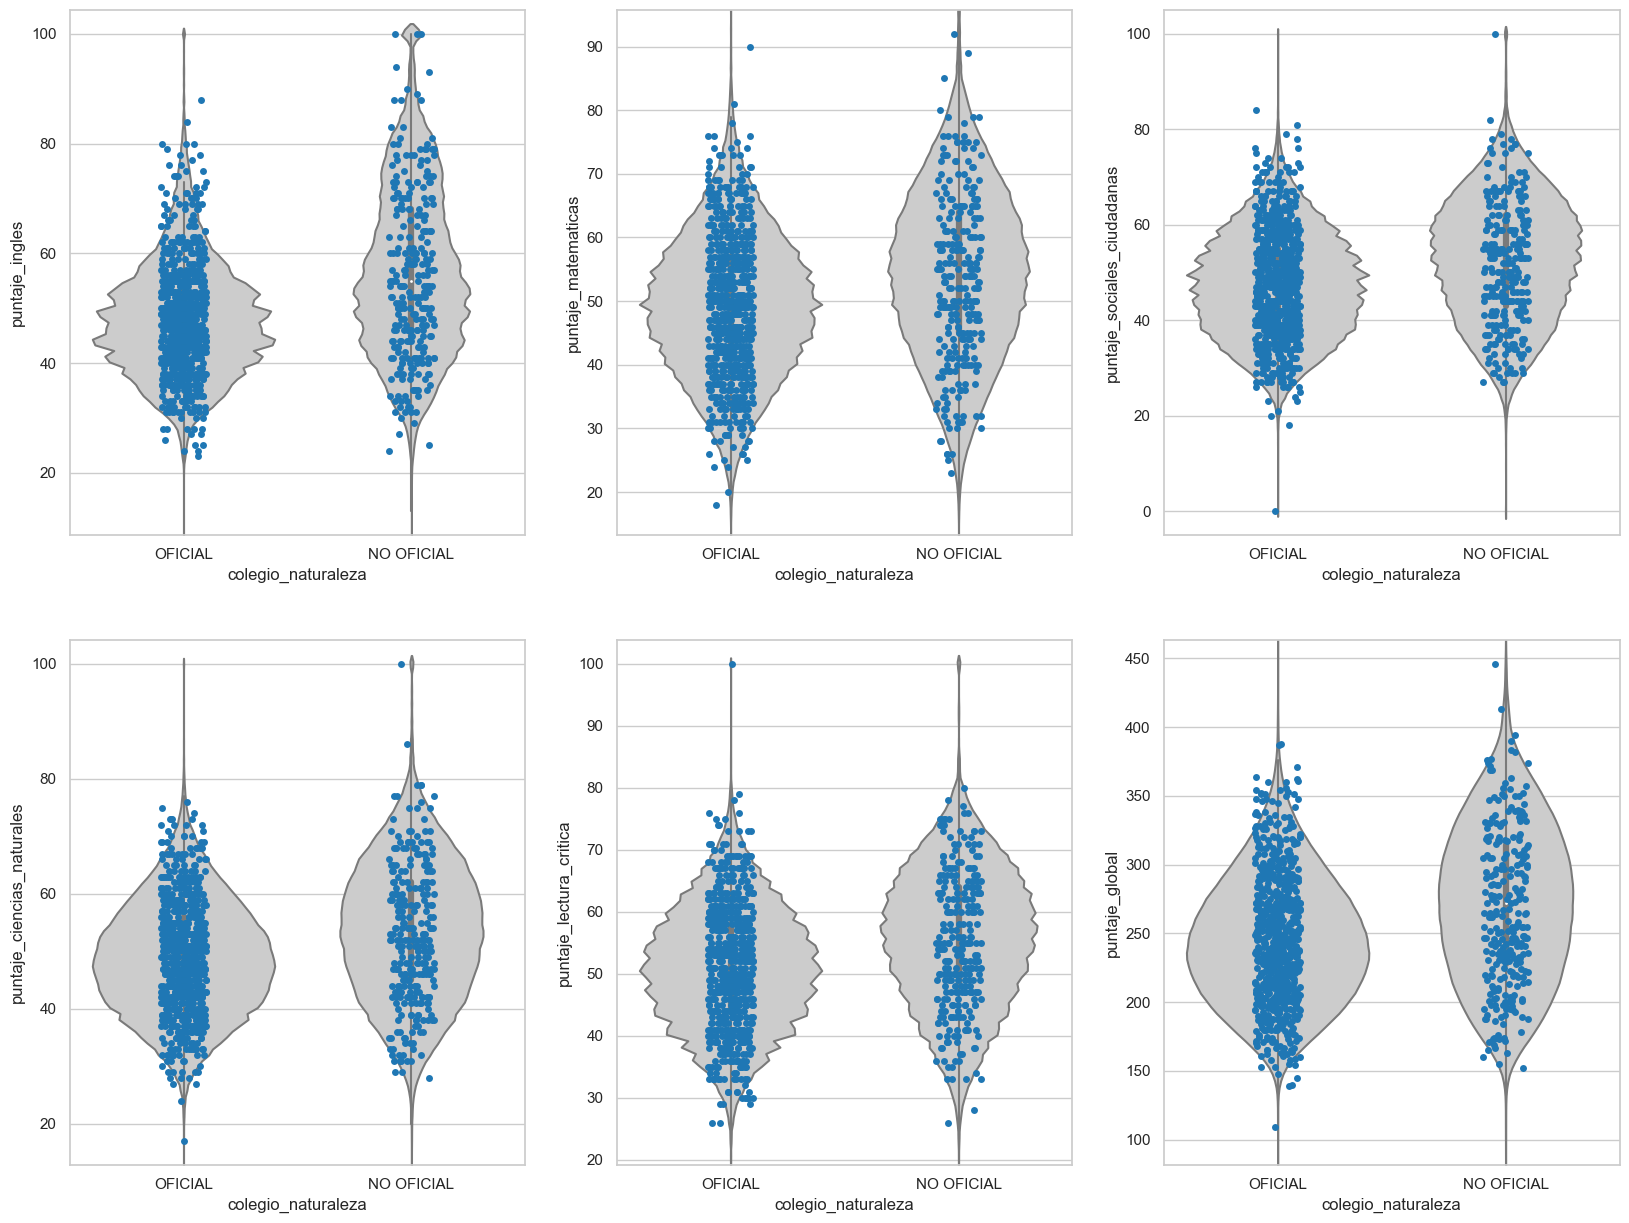

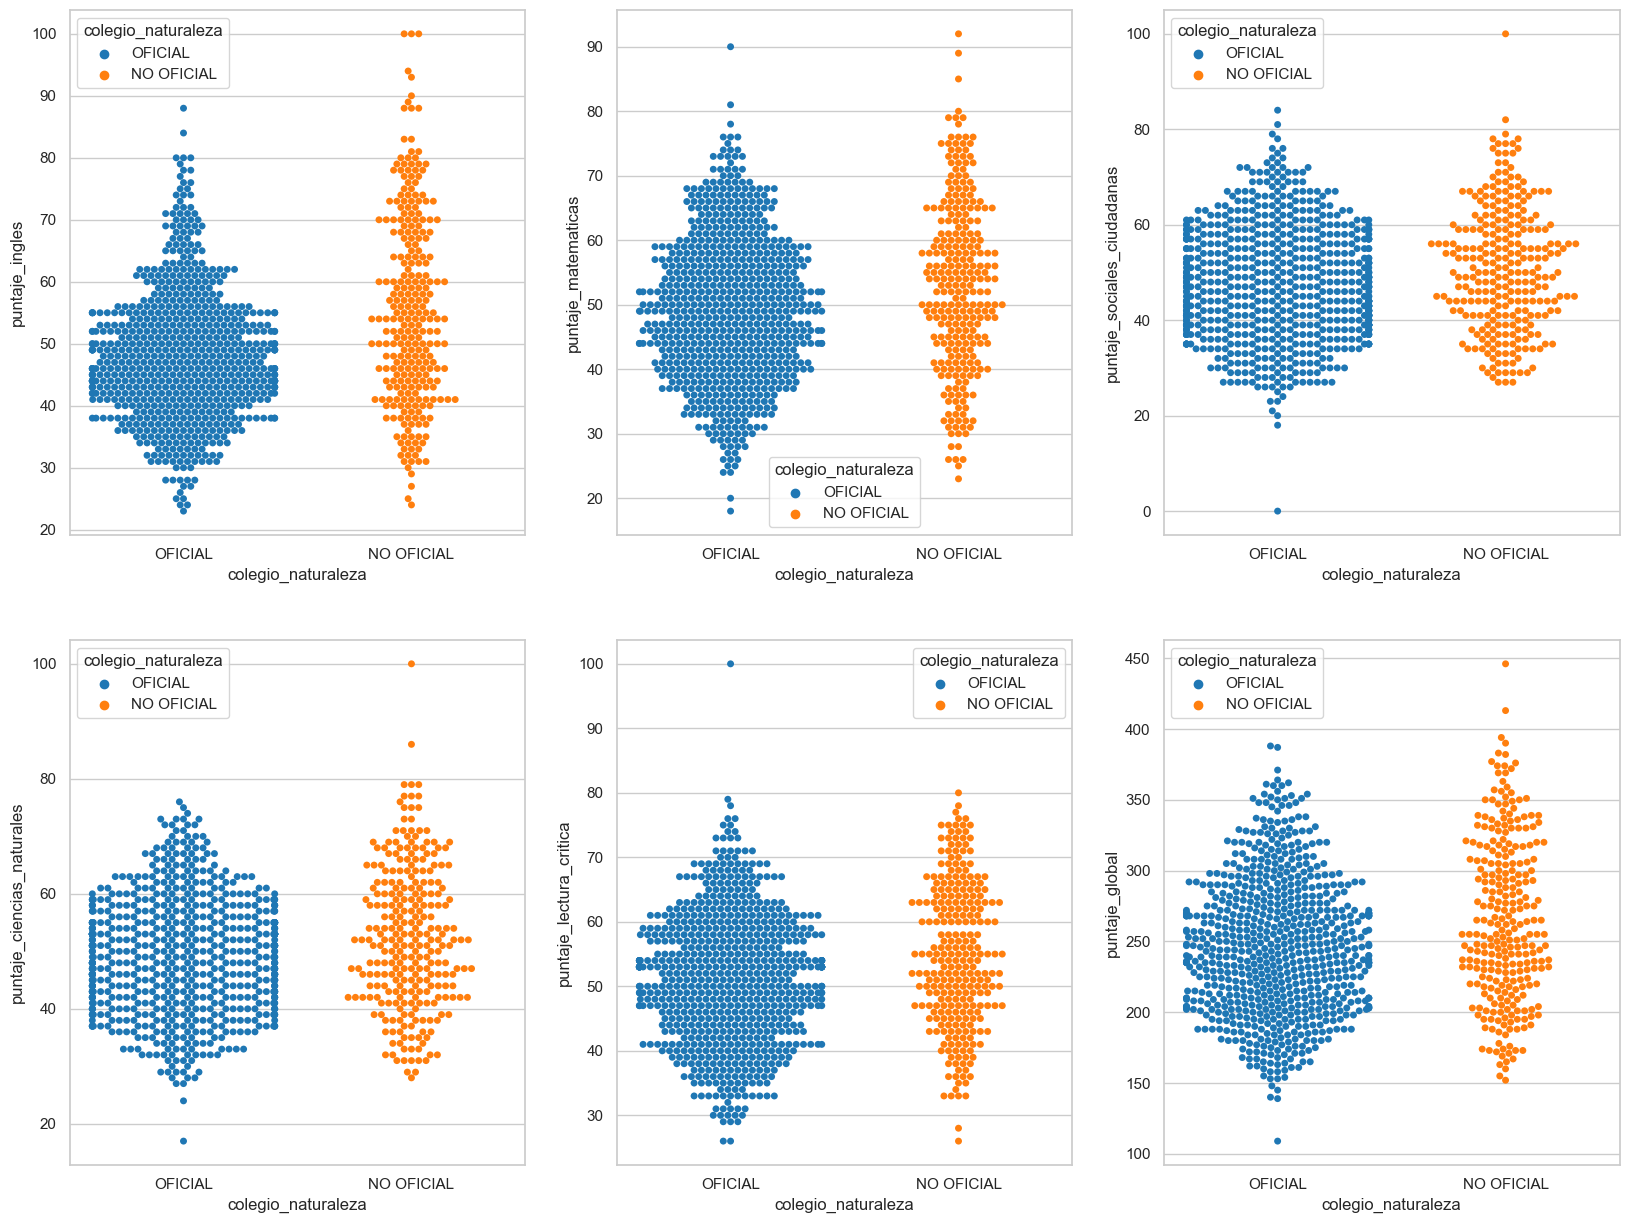

In [7]:
def plot_numeric_and_categorical(numeric_column: str, categorical_column: str, kind: str, sample_size: int) -> None:
    np.random.seed(42)
    match kind:
        case 'strip':
            sns.stripplot(
                data=raw_df.sample(sample_size),
                x=categorical_column,
                y=numeric_column,
                ax=plt.gca(),
            )
        case 'box':
            sns.boxplot(
                data=raw_df,
                x=categorical_column,
                y=numeric_column,
                ax=plt.gca(),
                whis=np.inf
            )
            sns.stripplot(
                data=raw_df.sample(sample_size),
                x=categorical_column,
                y=numeric_column,
                ax=plt.gca(),
                color='#33333388'
            )
        case 'violin':
            sns.violinplot(
                data=raw_df,
                x=categorical_column,
                y=numeric_column,
                ax=plt.gca(),
                whis=np.inf,
                color='.8',
            )
            sns.stripplot(
                data=raw_df.sample(sample_size),
                x=categorical_column,
                y=numeric_column,
                ax=plt.gca(),
            )
        case 'swarm':
            sns.swarmplot(
                data=raw_df.sample(sample_size),
                x=categorical_column,
                y=numeric_column,
                hue=categorical_column,
                ax=plt.gca(),
            )

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_numeric_and_categorical(column, 'colegio_naturaleza', 'strip', 1000)

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_numeric_and_categorical(column, 'colegio_naturaleza', 'box', 1000)

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_numeric_and_categorical(column, 'colegio_naturaleza', 'violin', 1000)

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plot_numeric_and_categorical(column, 'colegio_naturaleza', 'swarm', 1000)